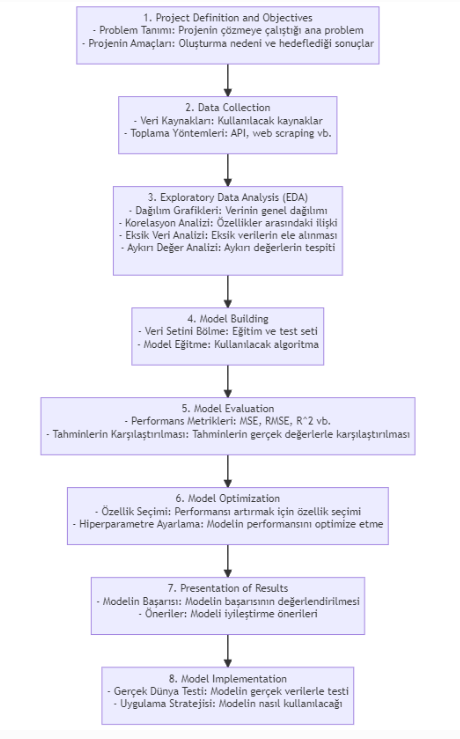
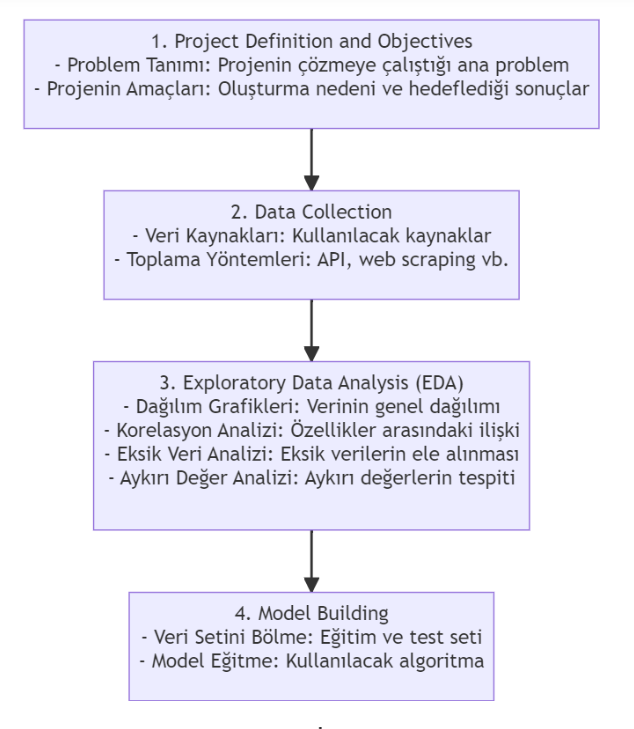
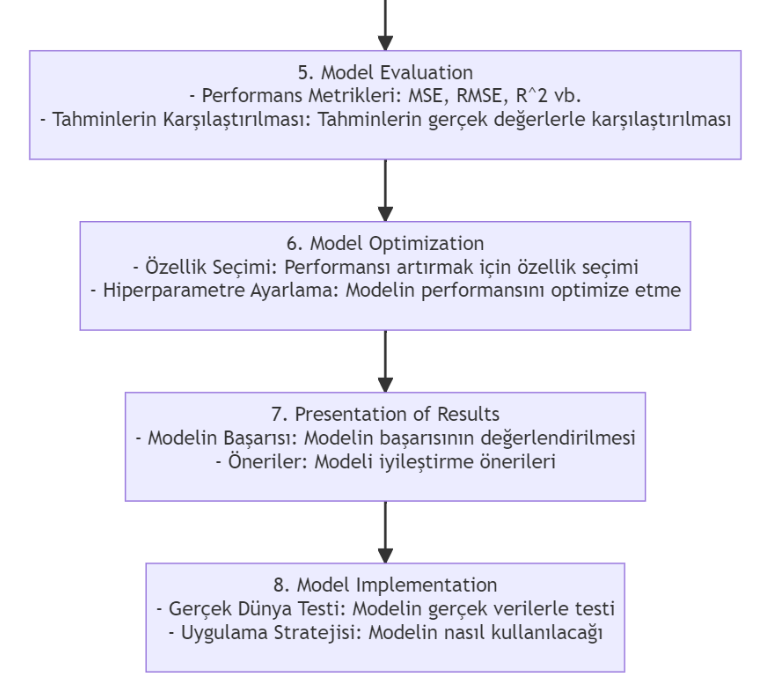

https://medium.com/p/c34dab36dc26

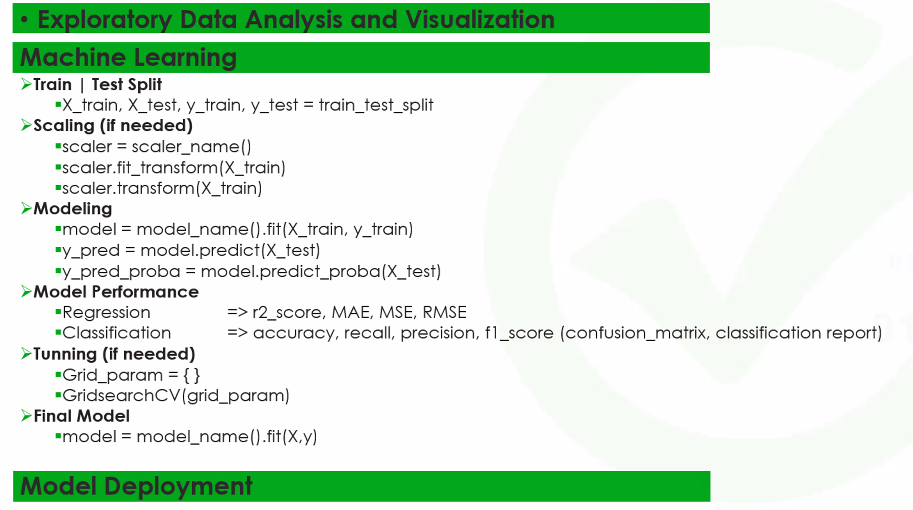

# <font color= green> <b> UNDERSTANDING THE DATA </b><font color= 'black'>

<h2 align="left"><font color= black>Project Description:</font></h2>   

- a
- b


**Purpose:**

<h2 align="left"><font color=black>About the Datasets </font></h2> 


**Veri setindeki sütunlar şu şekilde açıklanabilir:**

**Dataset Descriptions:** 'Human_Resources.csv'     
- **Rows:** 1470     
- **Columns:** 35    

|STT | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Age | Employee's age |
| 2 | Gender | Employee's Gender |
| 3 | BusinessTravel | Frequency of employees' business trips |


aşağıda tüm featureler tek tek açıklanır. 


**Transmission**

**"Transmission" sütunu, aracın şanzıman tipini belirtir:**

- `A`: Otomatik. Sürücünün vites değiştirmesine gerek kalmadan çalışan şanzıman tipi.



Bu veri seti, araçların yakıt verimliliği ve çevresel etkilerini anlamak için kullanılabilir. Makine öğrenimi modelleri, bu özellikleri kullanarak CO2 emisyonlarını tahmin edebilir veya farklı araçların yakıt tüketimini karşılaştırmak için analizler yapabilir.

# <font color='green'> <b>EDA AND DATA CLEANING </b><font color='black'>

## <font color='blue'> <b>Import Library</b><font color='black'>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline 

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

## <font color='blue'> <b>Read Dataset</b><font color='black'>

In [2]:
df0 = pd.read_csv('co2.csv')
df = df0.copy()

In [3]:
df.shape

(7385, 12)

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [6]:
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
650,LAND ROVER,RANGE ROVER SPORT V8 5.0 SC,SUV - STANDARD,5.0,8,AS8,Z,17.3,12.2,15.0,19,345
1301,CHEVROLET,COLORADO 4WD,PICKUP TRUCK - SMALL,2.5,4,A6,X,12.7,9.5,11.3,25,260
4426,AUDI,S6,MID-SIZE,4.0,8,AM7,Z,15.0,10.0,12.8,22,298
26,AUDI,A6 QUATTRO,MID-SIZE,2.0,4,AS8,Z,12.0,8.1,10.2,28,235
7051,KIA,Soul,STATION WAGON - SMALL,2.0,4,AV,X,8.6,7.1,7.9,36,188


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [9]:
df.describe(include="object").T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV 4X4,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [10]:
# Duplicated data

# df_duplicated = df[df.duplicated() == True]
# df_duplicated.shape
# df.drop_duplicates(inplace=True)

## <font color='blue'> <b>String Change</b><font color='black'>

In [11]:
#skimpy Kütüphanesi ile String Dönüşümleri


#!pip install skimpy
from skimpy import clean_columns
df1 = clean_columns(df)
df1.columns

Index(['make', 'model', 'vehicle_class', 'engine_size_l', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city_l_100_km',
       'fuel_consumption_hwy_l_100_km', 'fuel_consumption_comb_l_100_km',
       'fuel_consumption_comb_mpg', 'co_2_emissions_g_km'],
      dtype='object')

In [12]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : "model",
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': "cylinders",
    'Transmission' : "transmission",
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_columns, axis='columns', inplace=True)

## <font color='blue'> <b>Handling Missing Values</b><font color='black'>

In [13]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

# null değerlerin sayısını ve yüzdesini hesaplamak ve bunları bir DataFrame'de sunmak için kullanılır.

,count,percentage
make,0,0.0
model,0,0.0
vehicle_class,0,0.0
engine_size,0,0.0
cylinders,0,0.0
transmission,0,0.0
fuel_type,0,0.0
fuel_cons_city,0,0.0
fuel_cons_hwy,0,0.0
fuel_cons_comb,0,0.0


## <font color='blue'> <b>Data Summary</b><font color='black'>

In [14]:
# Let's observe our data in a table 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [15]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_cons_city,211,-,float64
8,fuel_cons_hwy,143,-,float64
9,fuel_cons_comb,181,-,float64


In [16]:
# tüm datanın nunique hesabı
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make                : 42
model               : 2053
vehicle_class       : 16
transmission        : 27
fuel_type           : 5


In [17]:
cat_features = ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']

In [18]:
num_features = ['fuel_cons_city', 'fuel_cons_hwy','fuel_cons_comb', 'mpgfuel_cons_comb', 'co2']

In [19]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

## Categorical Features

In [20]:
def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

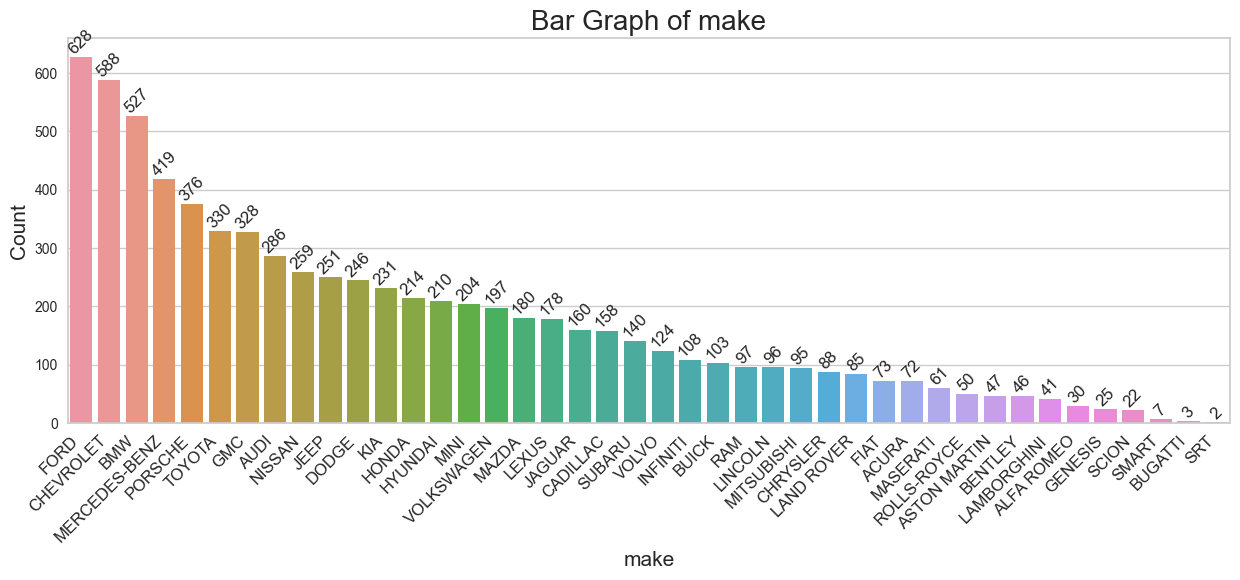

KeyError: 'vehicle_class'

<Figure size 1500x500 with 0 Axes>

In [199]:
plot_bar_graphs(df, cat_features)

## Numerical Features

In [22]:
def numerical_dist(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        sns.distplot(x=df[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Distribution of {column}', fontsize=20)
        plt.show()

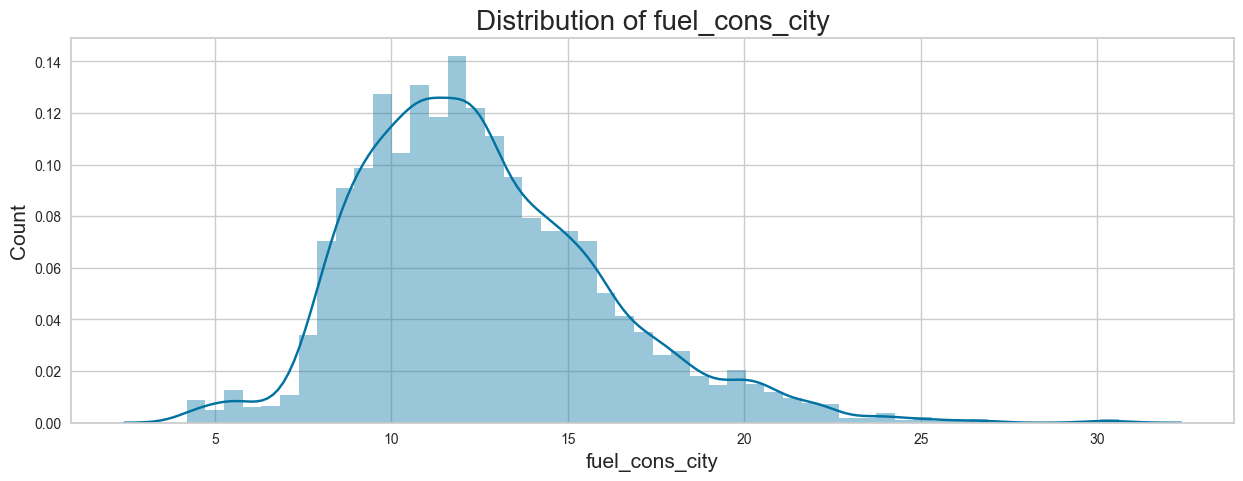

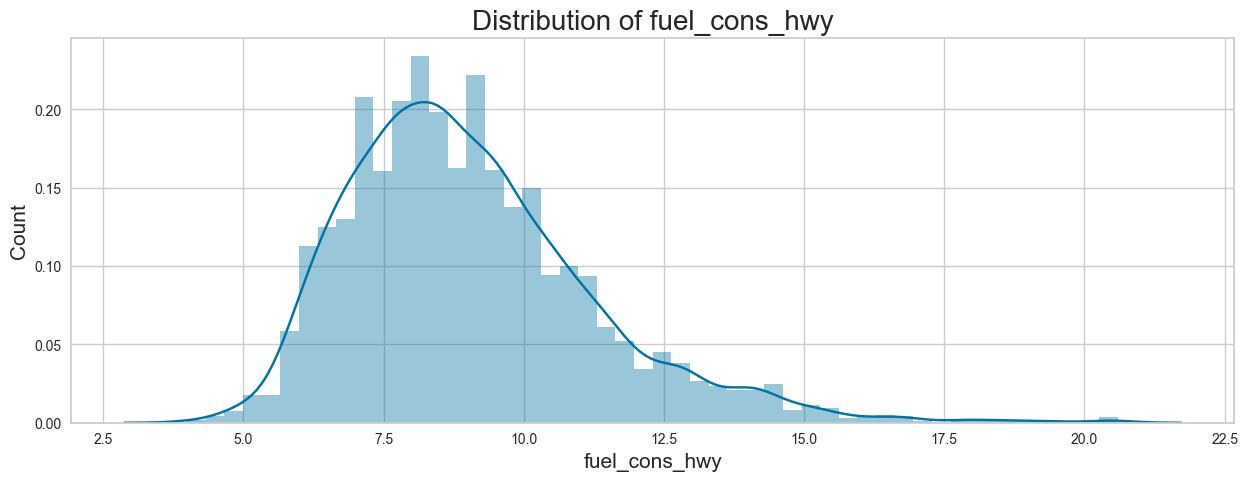

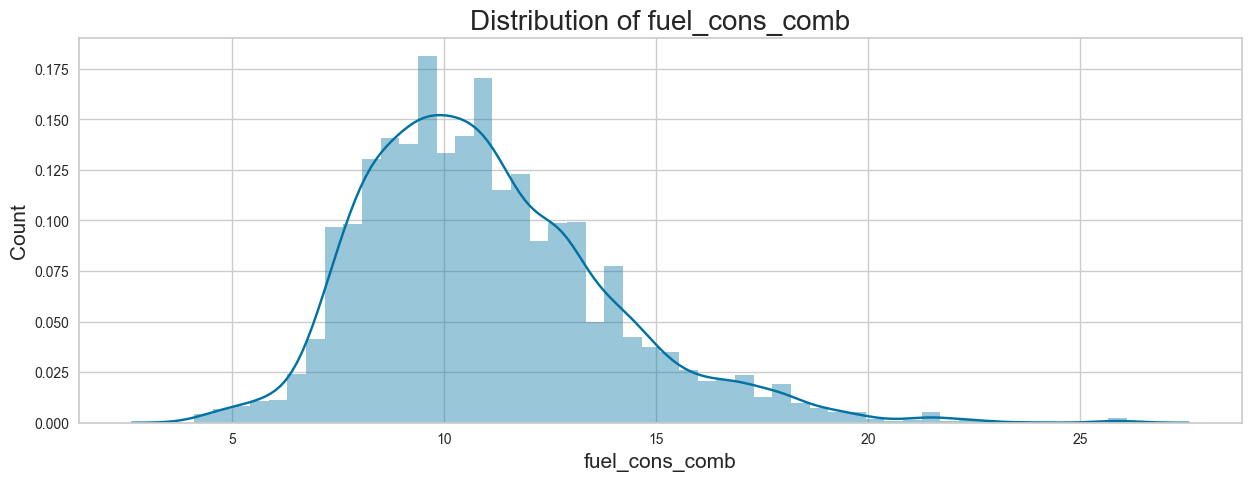

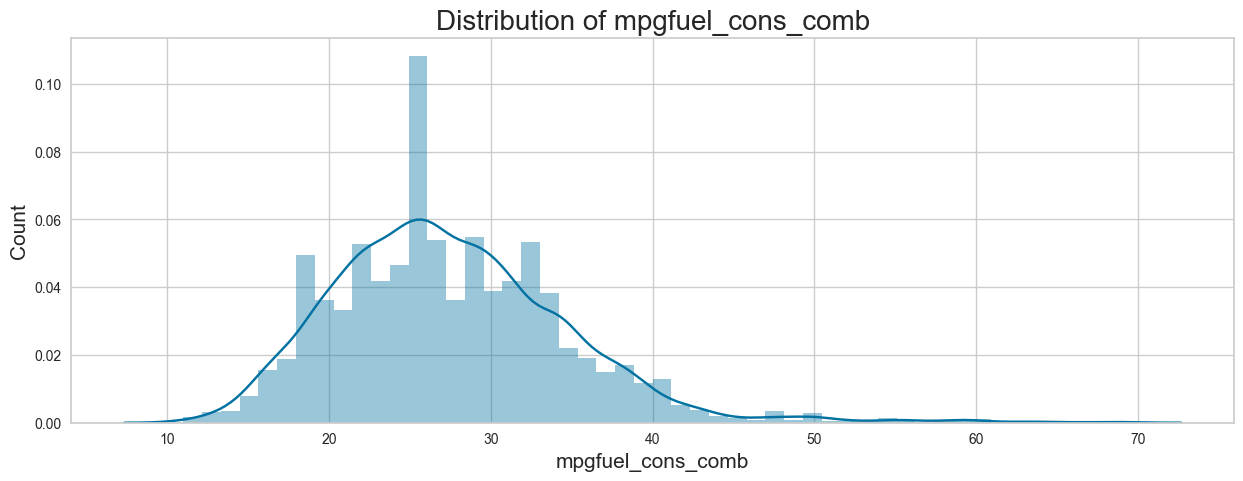

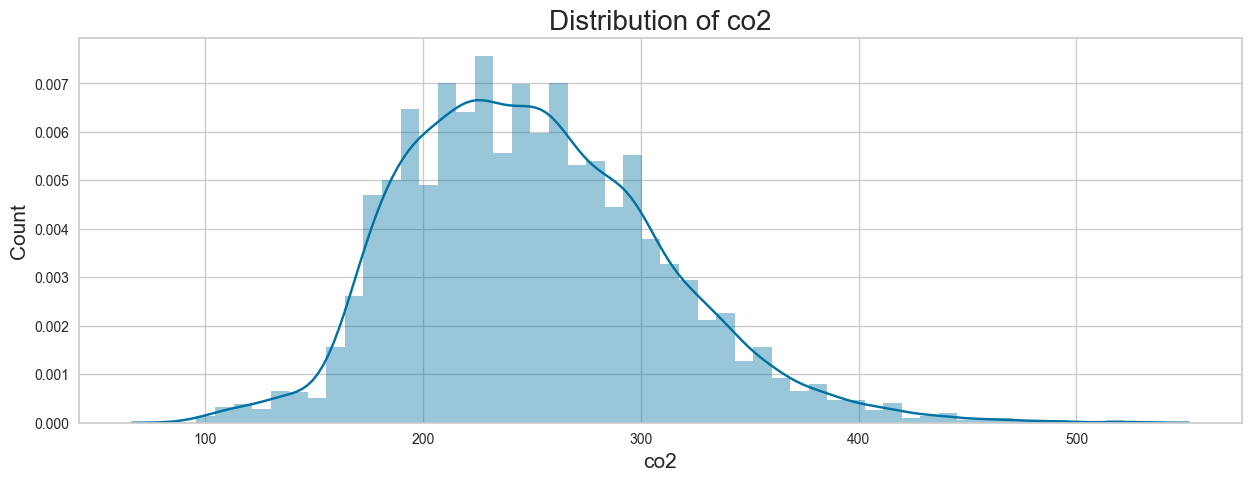

In [23]:
numerical_dist(df, num_features)

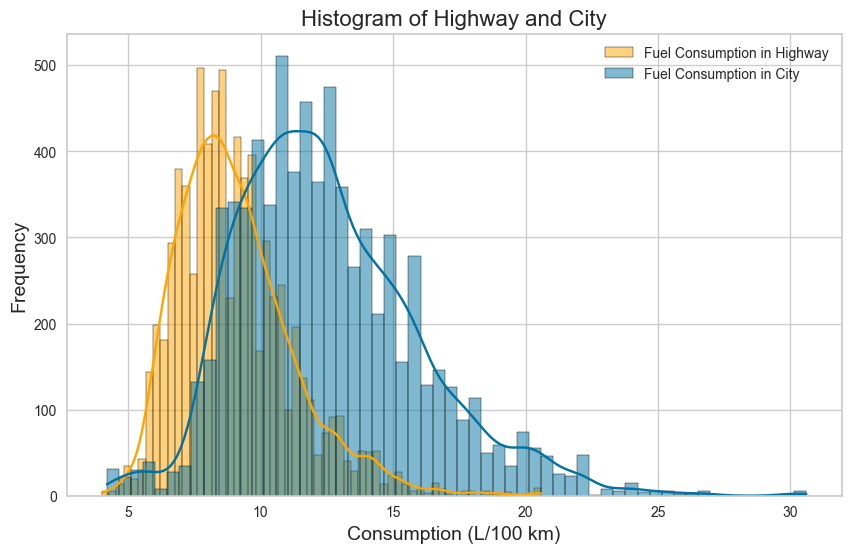

In [24]:
# Consumption of Highway and City

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="fuel_cons_hwy", kde=True, label = "Fuel Consumption in Highway",color = "orange")
sns.histplot(data=df, x="fuel_cons_city", kde=True, label = "Fuel Consumption in City")
plt.xlabel('Consumption (L/100 km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'Histogram of Highway and City', fontsize=16)
plt.legend()
plt.show()

# <font color='green'> <b>Outliers Check</b><font color='black'>

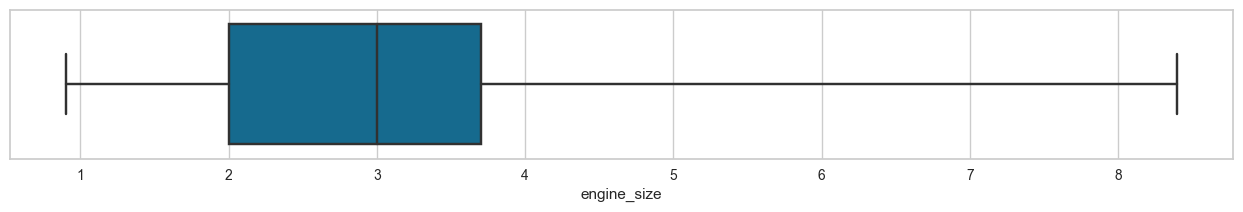

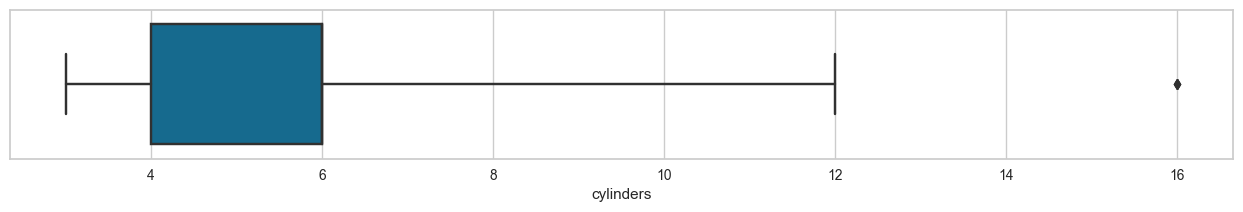

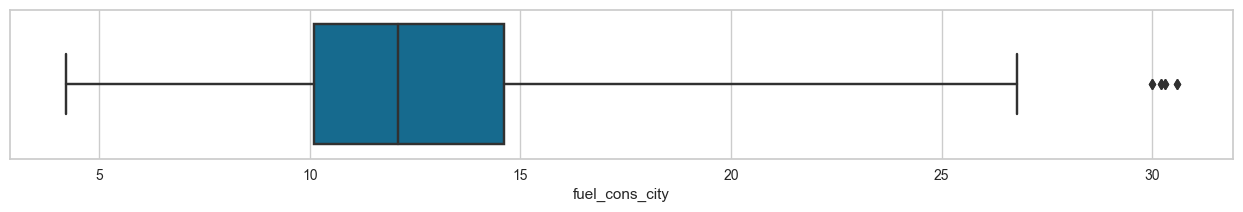

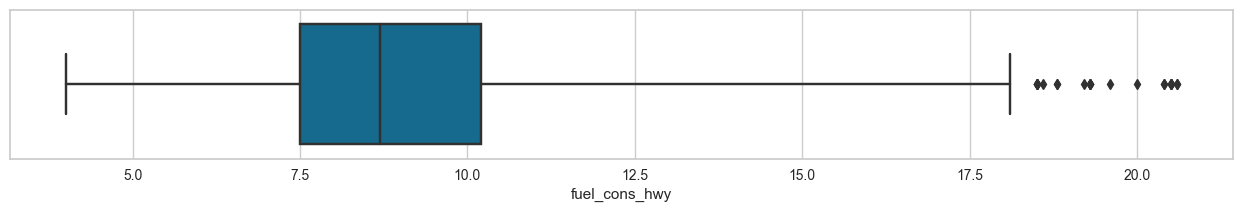

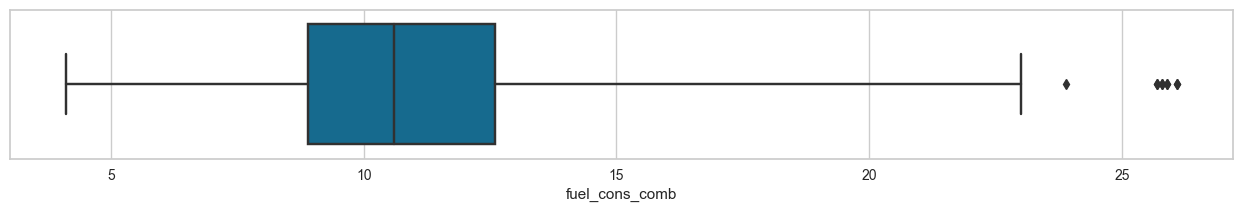

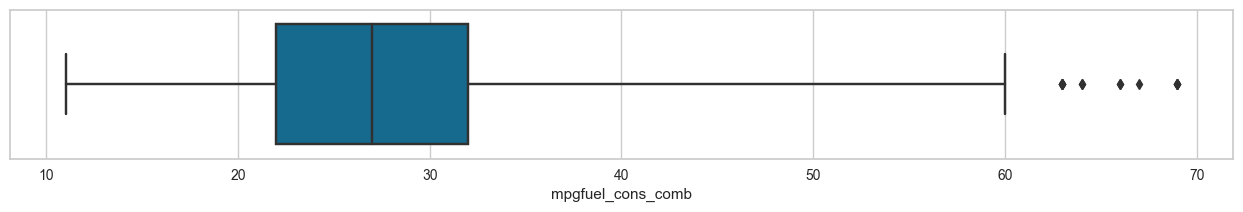

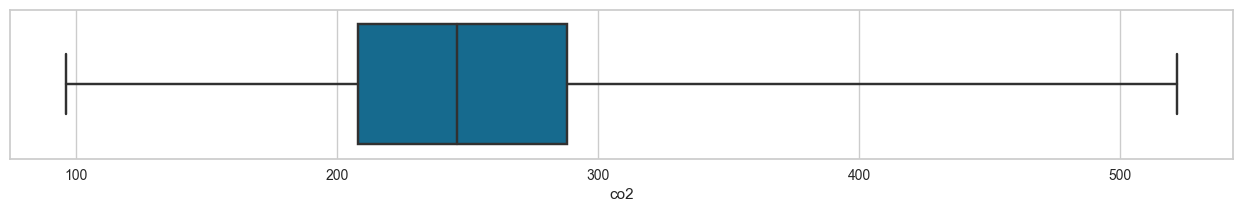

In [25]:
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(25,25))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

# <font color='green'> <b>Correlation</b><font color='black'>

In [26]:
df[df.co2 == df.co2.min()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
3824,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
4900,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
6950,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96


In [27]:
df[df.co2 == df.co2.max()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


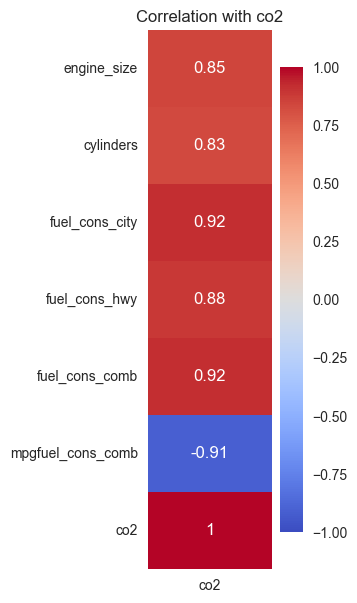

In [30]:
def plot_target_correlation_heatmap(df, target_variable):
    """
    Verilen DataFrame'deki belirli bir hedef değişkenle diğer sayısal değişkenler arasındaki korelasyonları içeren bir ısı haritası oluşturur.

    Parametreler:
    df (pandas.DataFrame): Korelasyon matrisi ve ısı haritası oluşturulacak veri çerçevesi.
    target_variable (str): Hedef değişkenin adı.
    """
    # Sayısal sütunları seçme ve hedef değişkenle korelasyon matrisini hesaplama
    numeric_df = df.select_dtypes(include=[np.number])
    df_corr_target = numeric_df.corr()
    
    # Hedef değişkenle korelasyonları içeren ısı haritası oluşturma
    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap='coolwarm')
    plt.title(f'Correlation with {target_variable}')
    plt.show()
plot_target_correlation_heatmap(df, 'co2')

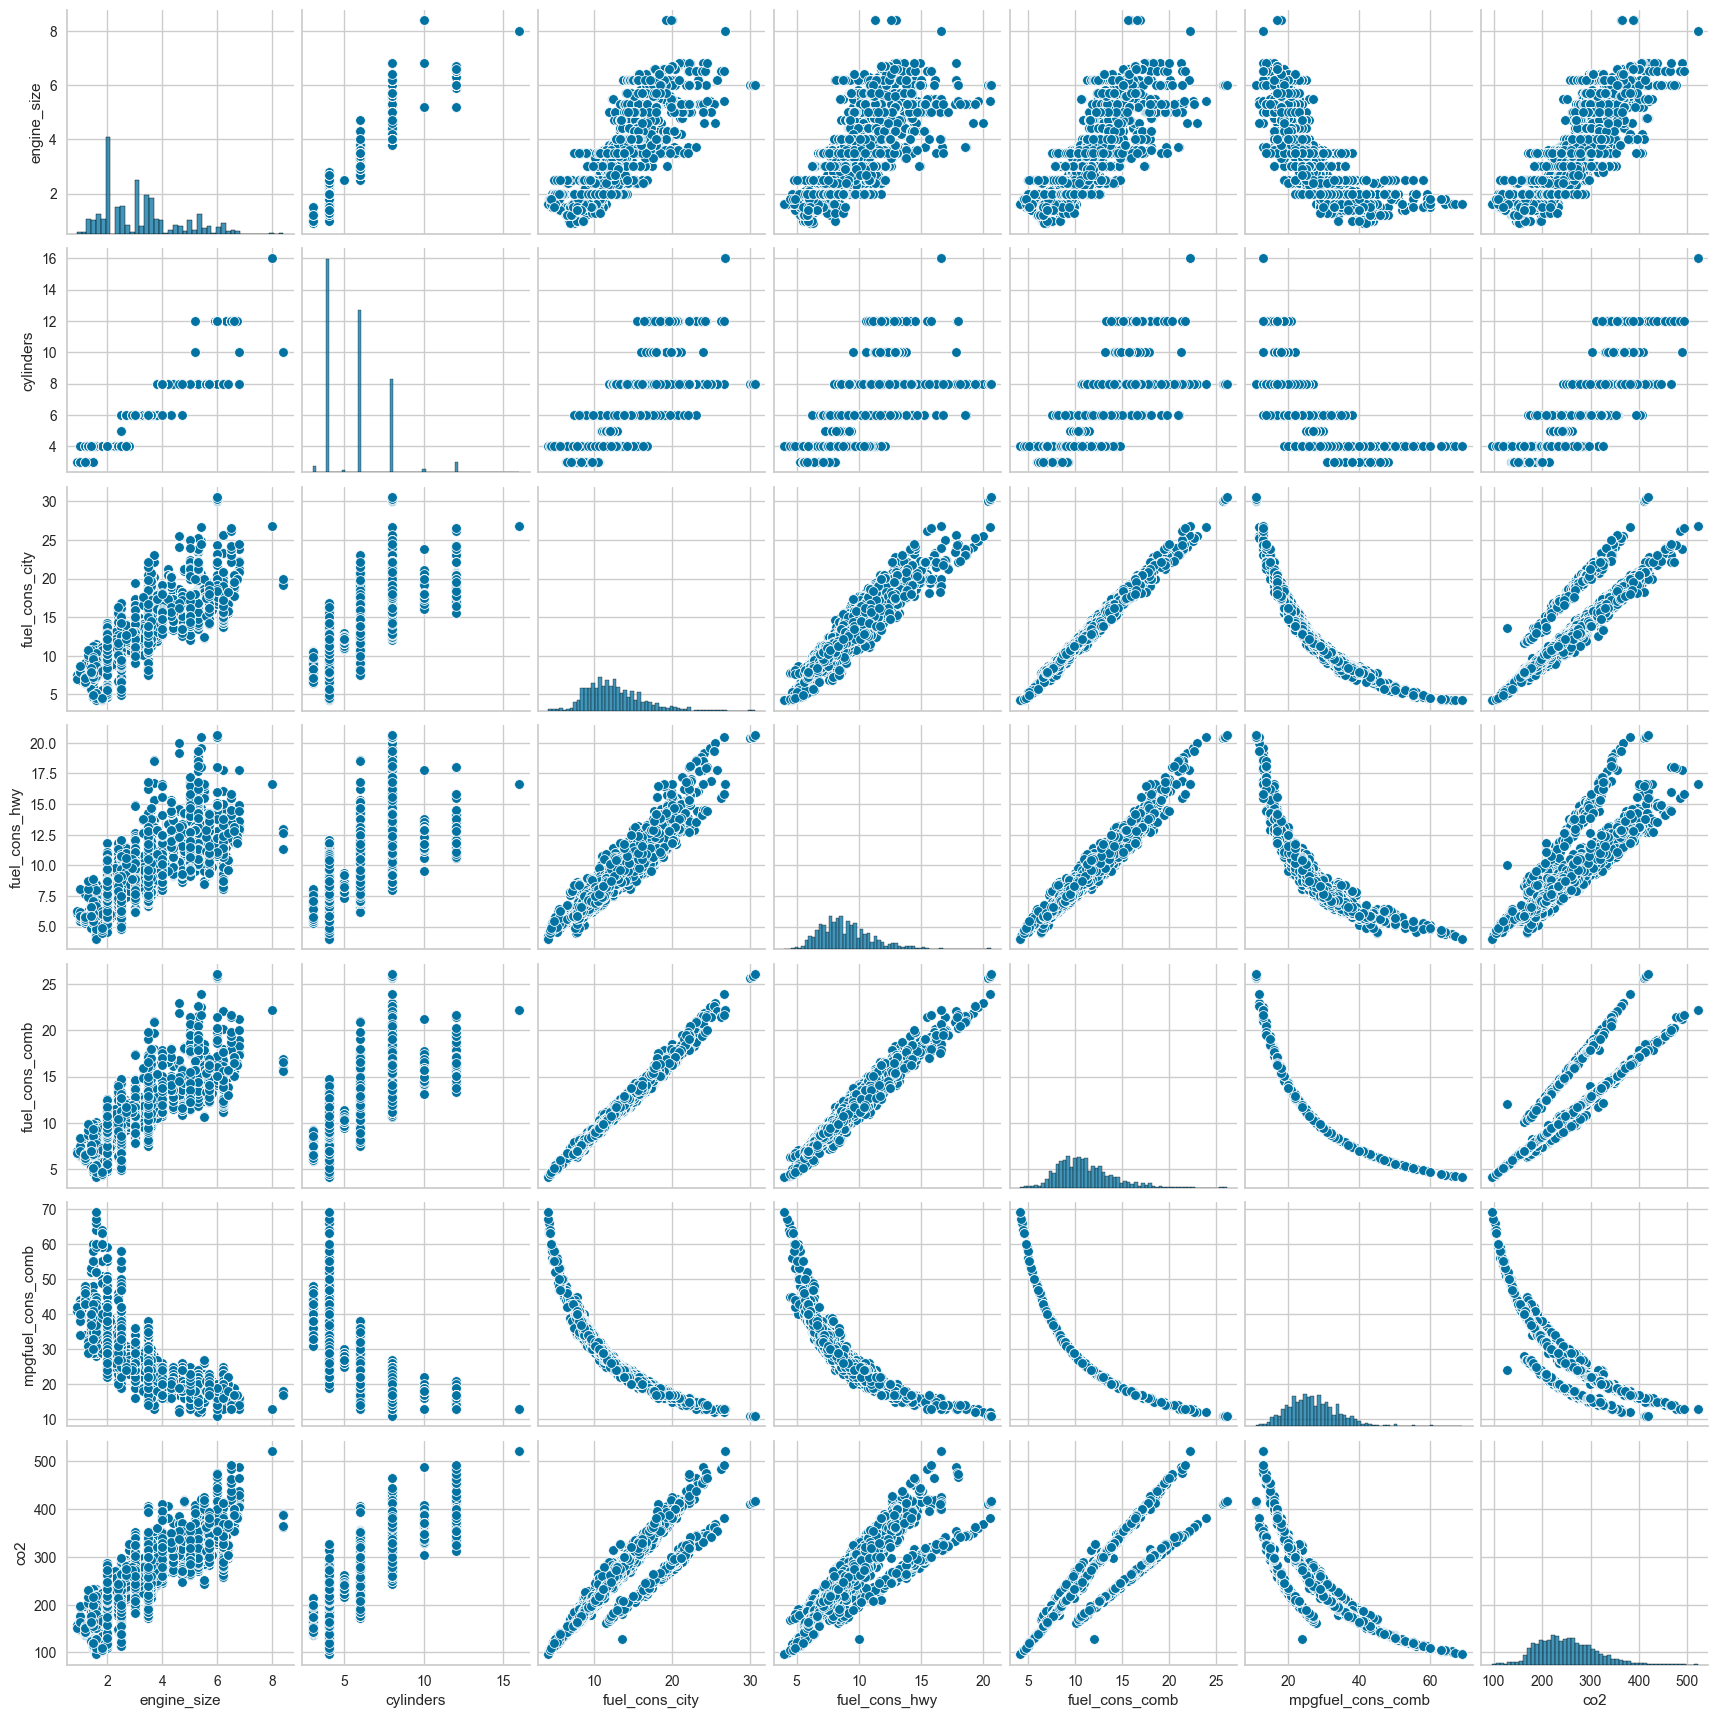

In [32]:
sns.pairplot(df);

# Pair plot, bir veri kümesindeki tüm sayısal değişkenlerin çiftleri arasındaki ilişkileri görselleştirmek için
# kullanılan bir grafik türüdür. Temel amacı, çok sayıda değişken arasındaki ilişkileri keşfetmek, özellikle de 
# hangi değişkenlerin birlikte değiştiğini veya birbiriyle korelasyonlu olduğunu belirlemek için kullanılır.

# veri kümesindeki ilişkileri daha iyi anlamak için oldukça yararlıdır. özellikle de büyük veri 
# kümeleri için, hangi değişkenlerin daha önemli olduğunu belirlemek, aykırı gözlemleri veya grupları tespit etmek ve 
# veri setindeki örüntüleri keşfetmek için kullanılır.

## Multicollinearity

In [33]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

# Sadece sayısal verileri içeren bir DataFrame oluştur
numeric_df = df.select_dtypes(include=[np.number])

# Sayısal DataFrame üzerinde korelasyon hesapla ve stillendir
numeric_df.corr().style.applymap(color_correlation1)


# - Korelasyon katsayısı `0.6` ile `0.99999` arasında veya `-0.6` ile `-0.99999` arasında ise, renk `kırmızı` olur.
# Bu, güçlü bir korelasyonu (pozitif veya negatif) gösterir.
# - Eğer korelasyon katsayısı `0.3` ile `0.6` arasında veya `-0.3` ile `-0.6` arasında ise,renk `mavi` olur.
# Bu, orta derecede bir korelasyonu gösterir.
# - Eğer korelasyon katsayısı tam `1` ise, renk `yeşil` olur. Bu, mükemmel pozitif korelasyonu gösterir.
# - Diğer tüm durumlar için renk `siyah` olur, bu da zayıf veya hiç korelasyon olmadığını gösterir.

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpgfuel_cons_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [ ]:
df1 = df.copy()

# <font color='green'> <b>Multiple Linear Regression Model</b><font color='black'>

In [34]:
def plot_high_correlation_features(df, target_variable, threshold=0.60):
    """
    Hedef değişken ile korelasyonu belirli bir eşikten yüksek olan özelliklerin grafiklerini oluşturur.

    Parametreler:
    df (pd.DataFrame): Veri çerçevesi.
    target_variable (str): Hedef değişkenin adı.
    threshold (float): Korelasyon eşiği. Bu eşikten yüksek korelasyona sahip özelliklerin grafikleri oluşturulacak.
    """
    # Sadece sayısal sütunları seçme
    numeric_df = df.select_dtypes(include=[float, int])
    
    # Korelasyon matrisini hesaplama
    corr_matrix = numeric_df.corr()

    # Hedef değişken ile yüksek korelasyona sahip özellikleri bulma
    high_corr_features = corr_matrix[target_variable][corr_matrix[target_variable].abs() > threshold].index.tolist()

    # Hedef değişkeni listeden çıkarma
    high_corr_features.remove(target_variable)

    # Grafikler oluşturma
    for feature in high_corr_features:
        sns.jointplot(y=df[target_variable], x=df[feature], kind='reg')
        plt.title(f'Correlation with {target_variable}: {feature}')
        plt.show()


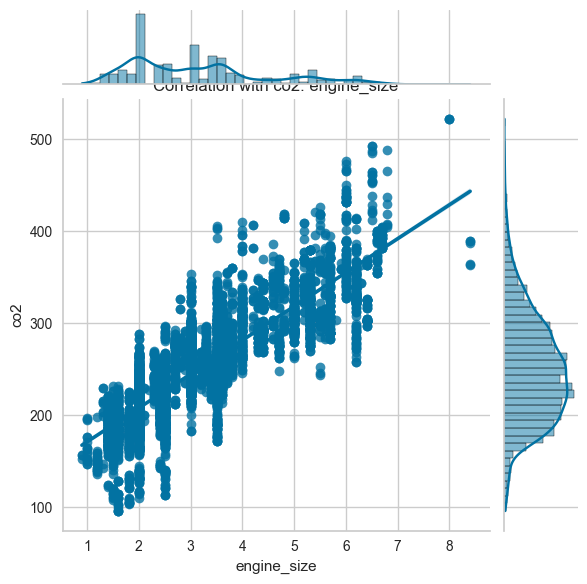

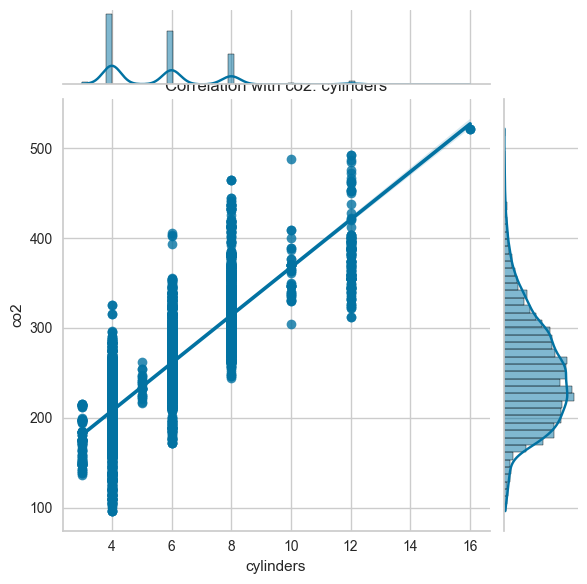

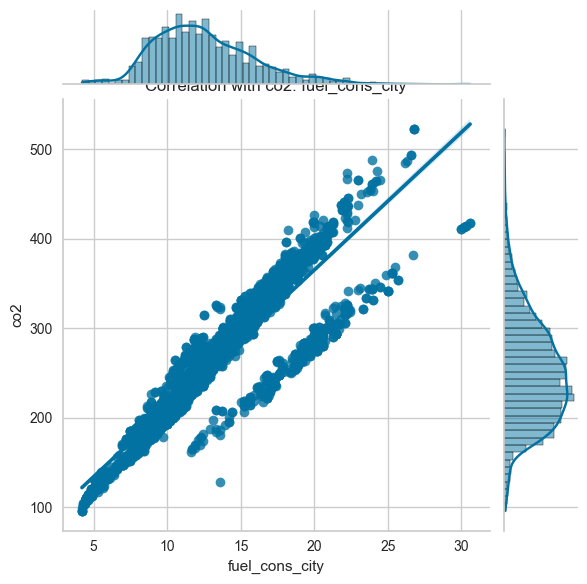

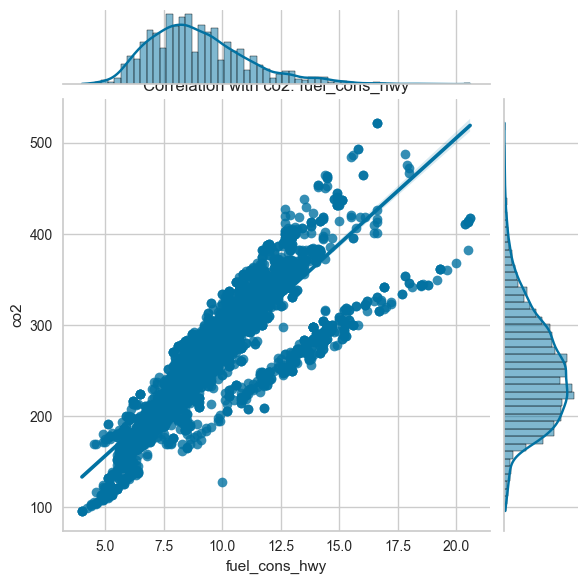

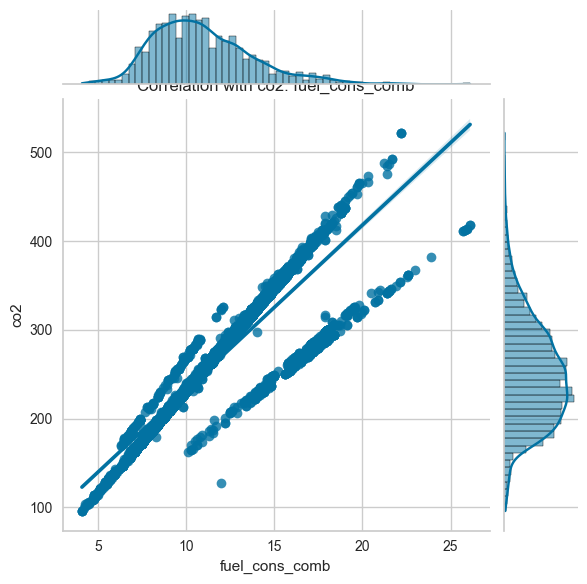

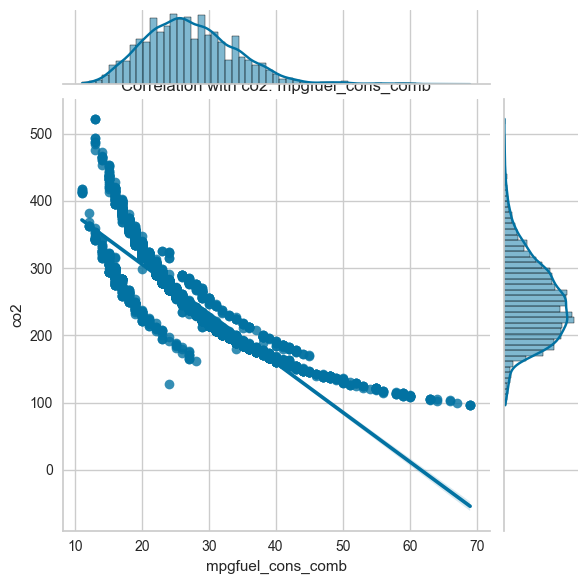

In [35]:
target_variable = 'co2'
plot_high_correlation_features(df, target_variable)

## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [36]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [37]:
X = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df['co2'] 

## <font color='blue'> <b>Training the Model</b><font color='black'>

In [38]:
from sklearn.model_selection import train_test_split
#Veri setinizi randomly olarak eğitim (training) ve test (testing) alt kümelerine ayırmak için kullanılır.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [40]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}" 
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5169, 4)
y Train features shape: (5169,)
X Test features shape: (2216, 4)
y Test features shape: (2216,)


In [41]:
mlr = LinearRegression()

In [42]:
mlr.fit(X_train, y_train)

LinearRegression()

In [45]:
mlr.coef_

array([12.63210709,  2.68240309,  0.44286467, 10.20241882])

In [44]:
mlr.intercept_

61.14287465659669

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [46]:
y_pred = mlr.predict(X_test)
y_train_pred = mlr.predict(X_train)

## <font color='blue'> <b>Evaluating the Model</b><font color='black'>

In [47]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [48]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
multiple_linear

,linear_train,linear_test
R2,0.875340,0.869634
mae,13.398754,13.480594
mse,429.044304,440.336866
rmse,20.713385,20.984205


In [49]:
avg_em= df['co2'].mean()
avg_em
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse
rmse/avg_em
# bu metriğe bakmak önemlidir.
# rmse metriğine göre modelimiz ortalama %8 hata yapıyor.

0.08374096771931899

## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [51]:
from sklearn.model_selection import cross_validate, cross_val_score

# cross_validate, cross_val_score iki fonksiyon da CV işlemi için kullanılabilir. Ancak cross_val_score tek bir metric için
# score döndürürken, cross_validate birden fazla metric için skor döndürebilir ve bu nedenle daha esnek ve geniş kullanım
# imkanları sunar. Bu sebeple sıklıkla tercih edilir.

In [52]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv = 10)

In [53]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.005161,0.000000,0.887040,-13.220992,-383.996184,-19.595821
2,0.008252,0.000792,0.865161,-13.708754,-474.356392,-21.779724
3,0.010304,0.001932,0.859194,-13.155354,-421.813506,-20.538099
4,0.004006,0.001022,0.877596,-13.295459,-428.096489,-20.690493
5,0.004972,0.000000,0.847732,-14.734929,-522.778801,-22.864357
6,0.002758,0.001099,0.859142,-13.318422,-452.071122,-21.261964
7,0.004096,0.001083,0.893665,-12.895122,-390.737373,-19.767078
8,0.003002,0.001016,0.895928,-12.723611,-362.333045,-19.035048
9,0.002986,0.001079,0.872817,-13.119481,-407.167555,-20.178393
10,0.002569,0.001111,0.882739,-14.022955,-463.195593,-21.521979


In [54]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                               0.874101
test_neg_mean_absolute_error        -13.419508
test_neg_mean_squared_error        -430.654606
test_neg_root_mean_squared_error    -20.723296
dtype: float64

In [55]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "m_linear")
multiple_linear

,m_linear_train,m_linear_test
R2,0.875340,0.869634
mae,13.398754,13.480594
mse,429.044304,440.336866
rmse,20.713385,20.984205


## <font color='blue'> <b>Residuals</b><font color='black'>

In [56]:
residuals = y_test-y_pred

# Bir datanın linear reg. uygun olup olmadığını anlamak için gerekli olan bazı varsayımların kontrolü için önce
# test datasındaki residualleri hesaplıyoruz.

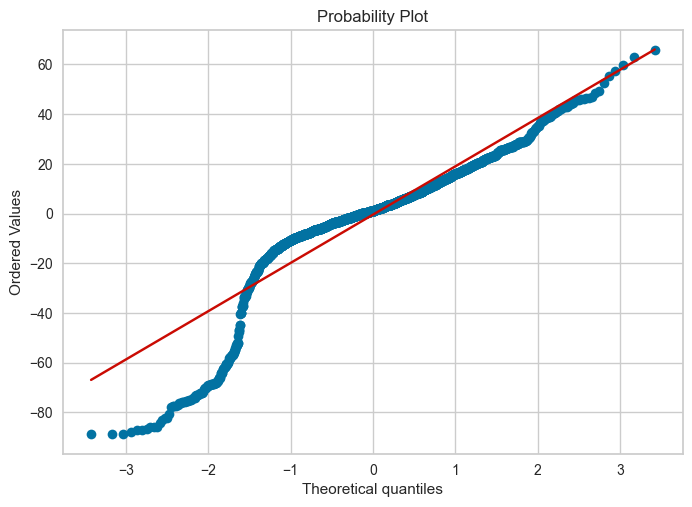

In [59]:
# pip install scipy
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt);

#probability plot; residulerin normal dağılıma uygunluğunu kontrol etmek için kullanılır.
#dist parametresi "norm" olarak ayarlanarak, normal bir dağılımın beklenen teorik dağılım olarak kullanılacağı belirtilir.
#Eğer veriler normal bir dağılıma sahipse, plot üzerindeki noktalar yaklaşık olarak doğru bir çizgi boyunca dağılır.
#Ancak, eğer veriler normal dağılıma uymuyorsa, noktalar çizginin dışında yayılır ve bu, modelin hatalarının 
#normal dağılıma uymadığına işaret eder.
#kırmızı çizgi üzerine gelmesi beklenir.

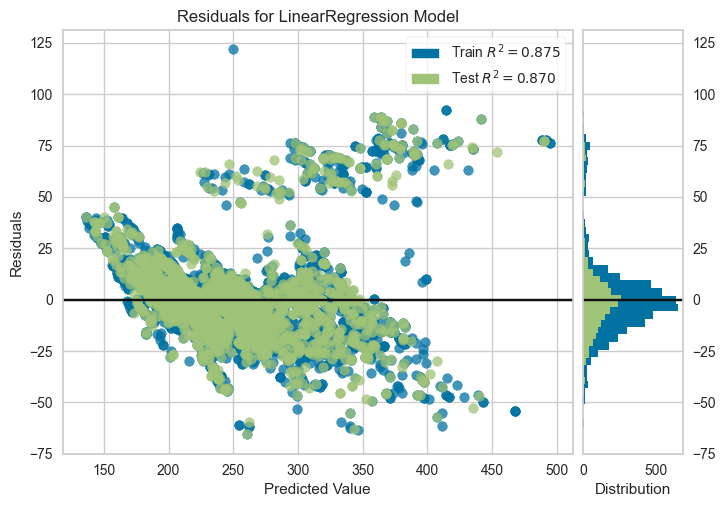

In [60]:
from yellowbrick.regressor import ResidualsPlot


model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();                

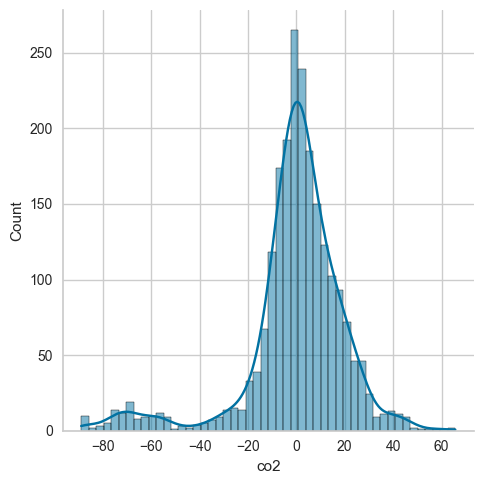

In [61]:
sns.displot((y_test-y_pred), bins=50, kde=True);

## <font color='blue'> <b>Prediction Error for LinearRegression</b><font color='black'>

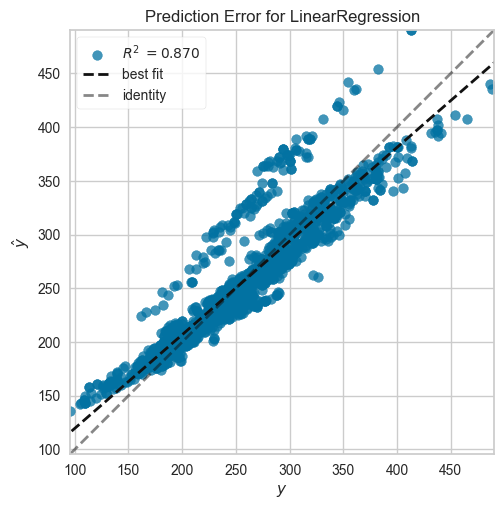

In [62]:
# hatalarımızın nasıl dağıldığına bakıyoruz

model = LinearRegression() # modelimizi reset ediyoruz
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # train datası ile eğitiyoruz  
visualizer.score(X_test, y_test)  # test datası ile skorlarını alıyoruz 
visualizer.show(); # grafikleri çizdiriyoruz

# <font color='green'> <b>Regularization (Overfitting varsa yapılır)</b><font color='black'>

## <font color='blue'> <b>Polynomial Conversion</b><font color='black'>

In [63]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False) ## For döngüsü döndükçe degreemiz artıyor,
        poly_features = polynomial_converter.fit_transform(X)                        # bundan dolayı feature sayımız artıyor.
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))

In [64]:
poly(8) 

,train_rmse_errors,test_rmse_errors,number of features
1,20.855262,20.665769,4
2,16.661711,16.560362,14
3,15.820798,15.626022,34
4,14.199758,14.116195,69
5,13.517680,15.304207,125
6,12.262983,30.837653,209
7,11.062161,142.961999,329


 train ve test ne zaman birbirinden ayrılmışsa bir öncekini seç yani burada 5 

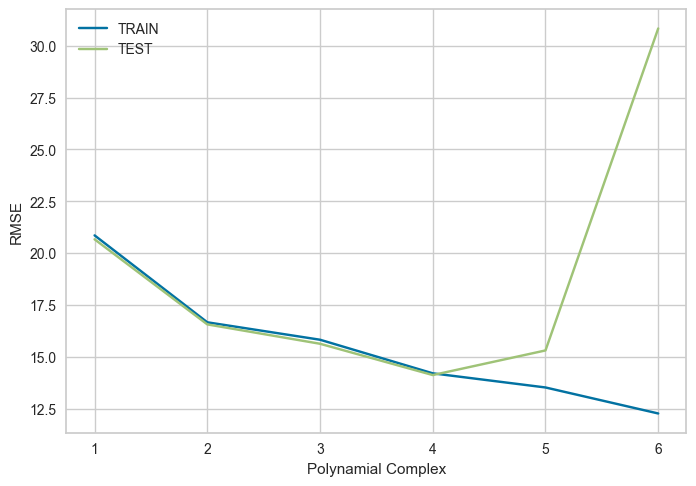

In [65]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [162]:
# we select degree 5
poly_converter = PolynomialFeatures(degree = 5, include_bias=False)

In [164]:
poly_features = poly_converter.fit_transform(X)

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [67]:
poly_lin_reg = LinearRegression()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

In [69]:
poly_lin_reg.fit(X_train, y_train)

LinearRegression()

In [70]:
y_train_pred = poly_lin_reg.predict(X_train)
y_pred = poly_lin_reg.predict(X_test)

In [71]:
poly_multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "poly(5)")
poly_multiple_linear

,poly(5)_train,poly(5)_test
R2,0.949157,0.934467
mae,7.019870,7.675089
mse,173.809574,225.407879
rmse,13.183686,15.013590


In [72]:
result = pd.concat([multiple_linear, poly_multiple_linear], axis=1)
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test
R2,0.875340,0.869634,0.949157,0.934467
mae,13.398754,13.480594,7.019870,7.675089
mse,429.044304,440.336866,173.809574,225.407879
rmse,20.713385,20.984205,13.183686,15.013590


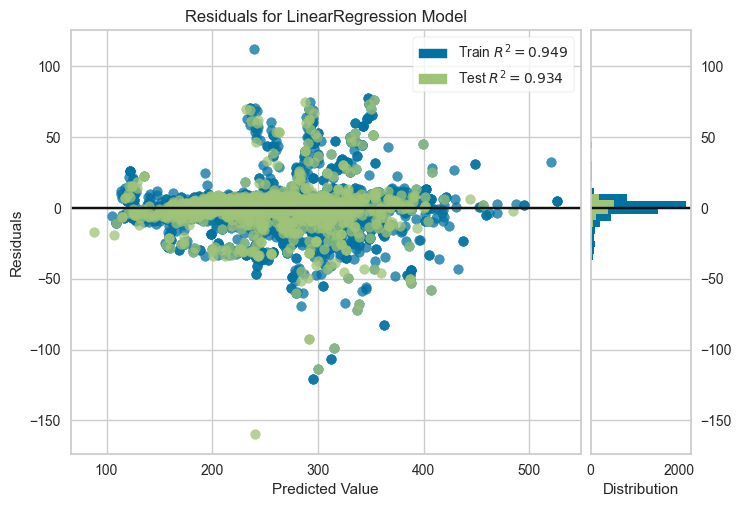

In [73]:
poly_lin_reg = LinearRegression()
visualizer = ResidualsPlot(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

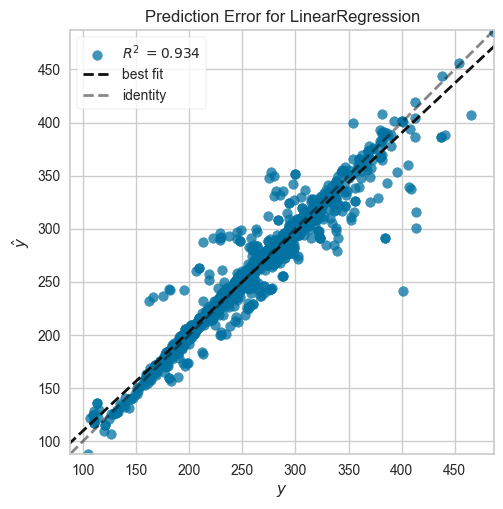

In [74]:
poly_lin_reg = LinearRegression()
visualizer = PredictionError(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## <font color='blue'> <b>Scaling the Data</b><font color='black'>

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [76]:
scaler = StandardScaler()

In [77]:
scaler.fit(X_train)

StandardScaler()

In [78]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled 

array([[-0.12149345, -0.33509065, -0.42937884, ..., -0.33771362,
        -0.33756256, -0.33695141],
       [ 0.6141664 ,  0.6072775 ,  0.56440556, ...,  0.02239441,
         0.02263538,  0.02140596],
       [-0.12149345,  0.350268  , -0.02283068, ..., -0.1828692 ,
        -0.16547449, -0.14786745],
       ...,
       [ 0.24633648, -0.24942082, -0.11317471, ..., -0.282759  ,
        -0.28993932, -0.29648884],
       [-0.48932338, -0.87766626, -0.74558297, ..., -0.40528358,
        -0.40827898, -0.410145  ],
       [ 0.6141664 ,  0.23604156,  0.47406152, ..., -0.08403116,
        -0.10127521, -0.11833407]])

In [79]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled 

array([[-0.12149345, -0.04952455, -0.02283068, ..., -0.24107016,
        -0.24429473, -0.24745007],
       [ 0.90843035,  1.34974937,  1.1516418 , ...,  0.51484535,
         0.54114823,  0.56366984],
       [ 2.23261809,  1.00707004,  1.06129776, ...,  0.34886065,
         0.34466679,  0.33735411],
       ...,
       [-1.29854922, -1.07756253, -1.10695912, ..., -0.43846741,
        -0.43868119, -0.43782082],
       [ 0.24633648, -0.1923076 , -0.38420683, ..., -0.31968074,
        -0.31681695, -0.31363447],
       [-0.85715331, -0.84910965, -1.10695912, ..., -0.43062526,
        -0.42843243, -0.42532815]])

## Ridge Regression

In [80]:
from sklearn.linear_model import Ridge

In [81]:
ridge_model = Ridge(alpha=1) #default alpha=1 alpha=regülarizasyon kuvveti

# alpha reg. hyper parametresidir. Bu deger büyüdükçe uygulanan reg. kuvveti artar. overfitingi yenmek için 
# bu hyper parameter artırılmalıdır.

In [82]:
ridge_model.fit(X_train_scaled, y_train)

# ridge reg.algortimasında eğitim yapacağımız data mutlaka scale edilmiş olmalıdır.Bu işlem tüm featurlara model tarafından
# eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor hemde featureları önemli önemsiz olarak 
# gruplandırabiliyor

Ridge(alpha=1)

In [83]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [84]:
ridge = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge

,ridge_train,ridge_test
R2,0.937498,0.926090
mae,7.527301,8.073485
mse,213.667103,254.222632
rmse,14.617356,15.944361


In [85]:
result = pd.concat([result, ridge], axis=1)
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test
R2,0.875340,0.869634,0.949157,0.934467,0.937498,0.926090
mae,13.398754,13.480594,7.019870,7.675089,7.527301,8.073485
mse,429.044304,440.336866,173.809574,225.407879,213.667103,254.222632
rmse,20.713385,20.984205,13.183686,15.013590,14.617356,15.944361


### RidgeCV alpha:1

In [86]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

# Default alpha değerimize göre CV'dan scorlarımızı alıyoruz.
# neg=negatif olmasının sebebi; normalde değerleri maximize etmeye çalışıyor, dolayısıyla errorları maximize etmemesi için

In [87]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# train ve validation seti scorlarının biribirlerine yakın olduğunu görüyoruz ve artık overfiting olmadığına kesin
# kanaat getiriyoruz.

test_r2                                0.935450
train_r2                               0.937487
test_neg_mean_absolute_error          -7.615777
train_neg_mean_absolute_error         -7.537758
test_neg_mean_squared_error         -219.901061
train_neg_mean_squared_error        -213.695196
test_neg_root_mean_squared_error     -14.778801
train_neg_root_mean_squared_error    -14.617622
dtype: float64

In [88]:
ridge_score = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_CV_a1")
ridge_score

,ridge_CV_a1_train,ridge_CV_a1_test
R2,0.937498,0.926090
mae,7.527301,8.073485
mse,213.667103,254.222632
rmse,14.617356,15.944361


In [90]:
result = pd.concat([result, ridge_score], axis=1)
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test,ridge_CV_a1_train,ridge_CV_a1_test
R2,0.875340,0.869634,0.949157,0.934467,0.937498,0.926090,0.937498,0.926090
mae,13.398754,13.480594,7.019870,7.675089,7.527301,8.073485,7.527301,8.073485
mse,429.044304,440.336866,173.809574,225.407879,213.667103,254.222632,213.667103,254.222632
rmse,20.713385,20.984205,13.183686,15.013590,14.617356,15.944361,14.617356,15.944361


### RidgeGridSearchCV

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

# GridsearchCV(GS) algortiması öncelikle ilgili hyperparametre (HP) için bir uzay aralığı ister. Bunun için GS'e 
# vereceğimiz uzay aralığını belirliyoruz. (0.01 ile 1 arasında eşit aralıklarla bölünmüş 100 farklı değer veriyoruz)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [93]:
ridge_model = Ridge()

# GridsearchCV ayrıca kulllanacağımız ML algortimasını ister.

In [94]:
param_grid = {"alpha":alpha_space}

In [95]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =1, return_train_score=True)

# ridge ML modelinin scorlarının hangi metrice göre scorlarının iyileştirilmesini istiyorsak scoring karşısına ilgili 
# metricimizi yazıyoruz. Tek bir metrik yazabiliriz. Default degeri R2_scorudur.

# GridsearcCV istediğimiz metrici maximize edecek şekilde hyperparameter uzayındaki tüm değerler için ayrı ayrı 
# datanın farklı bölgelerinden scorlar alır (cv'de belirttiğimiz sayıya göre) ve bunların ortalamasını hesaplar. 
# Ortalaması en yüksek olan hyperparameter değer/değerlerini döndürür.

# default cv sayısı 5'dir.

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [96]:
grid_ridge.fit(X_train_scaled, y_train)

# cv =10 verdiğimizden her alpha değeri için datanın 10 farklı bölgesinde eğitimler yapıyor

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [97]:
grid_ridge.best_params_

{'alpha': 0.01}

In [98]:
grid_ridge.best_index_

0

In [99]:
pd.DataFrame(grid_ridge.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

# ilgili df'in best indexinden "mean_test_score" ile "mean_train_score" ları çekilip karşılaştırılırak overfitting,
# underfiting değerlendirilmesi yapılır. 

# GridsearchCV aynı zamanda Cross validation işlemi de yaptığından extradan cross validation yapmamıza gerek yok.

# Burda aldığımız scorelar gridsearchcv içerisine verdiğimiz scoring metricinin scorelarıdır.

mean_test_score    -14.263797
mean_train_score   -14.063065
Name: 0, dtype: object

In [100]:
grid_ridge.best_score_

# bu kod sodece validation setinin scorunu döndürür.

-14.263796887919435

In [101]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

# GiridsearchCv sonrası elde ettiğimiz grid_ridge modeli üzerinde en iyi hyperparameter bilgisini bulunur.
# Ve skorları bu hyperparametreye göre döndürür. Gördüğünüz gibi grid_ridge bir ML algortiması gibi kullanılabiliyor

In [102]:
rg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rg_score

# En iyi alpha değeri ile scorlarımız daha da iyileşti.

,grid_ridge_train,grid_ridge_test
R2,0.942140,0.931004
mae,7.076775,7.607565
mse,197.798681,237.322056
rmse,14.064092,15.405261


In [103]:
result = pd.concat([result, rg_score], axis=1)
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test,ridge_CV_a1_train,ridge_CV_a1_test,grid_ridge_train,grid_ridge_test
R2,0.875340,0.869634,0.949157,0.934467,0.937498,0.926090,0.937498,0.926090,0.942140,0.931004
mae,13.398754,13.480594,7.019870,7.675089,7.527301,8.073485,7.527301,8.073485,7.076775,7.607565
mse,429.044304,440.336866,173.809574,225.407879,213.667103,254.222632,213.667103,254.222632,197.798681,237.322056
rmse,20.713385,20.984205,13.183686,15.013590,14.617356,15.944361,14.617356,15.944361,14.064092,15.405261


In [104]:
rgm = Ridge(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rgm.coef_

# grid modellerinin coef_ özelliği olmadığından grdisearch sonrası bulduğumuz en iyi hyperparametere göre manuel olarak 
# modeli yeniden kurup eğitiyoruz ve coef_leri elde ediyoruz.

array([ -19.18597555,  -19.09662581, -152.83343127,  -81.37451968,
        135.41141587, -231.90575376,  125.12778165,  -42.1587839 ,
        275.53206906,  120.01213246,  217.85136464,  248.78051658,
        159.59658405,  232.39790612,   12.47391798, -208.45439503,
       -105.45201758, -113.34700023,  112.60987332,   63.31961646,
        109.14511966,   76.78504819,   69.76705757,  125.15402341,
       -379.05211688, -173.65817802, -315.20672225,  -57.65725294,
       -150.126688  , -244.49615819,  -96.77321376,  -90.52864697,
       -121.76569422, -165.93539199,  226.93977945,  -52.75384954,
       -185.15562505,  -47.57799103,   69.03589307,    6.18389298,
         52.32747121, -227.8279732 ,  -91.3611286 ,   11.54923325,
        187.14927408,  143.41636398,  153.84577845,   63.95625273,
         79.82043836,  117.66265688, -117.19495709,  -47.74517955,
          9.7435363 ,   78.51798986,  108.50195415,  -24.90981331,
         58.55579318,   38.67471231,  -14.9723199 ,   42.07929

## Lasso Regression

In [105]:
from sklearn.linear_model import Lasso

In [106]:
lasso_model = Lasso(alpha=1)

# Lasso modeli de datanın scale edilmiş halde verilmesini ister. Bu işlem tüm featurlara model tarafından
# eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor hemde feature selection işlemi yapmamızı sağlıyor

In [107]:
lasso_model = lasso_model.fit(X_train_scaled, y_train)

In [108]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [109]:
ls_score = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
ls_score

,lasso_train,lasso_test
R2,0.893727,0.890206
mae,11.606836,11.746149
mse,363.300033,377.650475
rmse,19.060431,19.433231


In [110]:
result = pd.concat([result, ls_score], axis=1)
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test,ridge_CV_a1_train,ridge_CV_a1_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.875340,0.869634,0.949157,0.934467,0.937498,0.926090,0.937498,0.926090,0.942140,0.931004,0.893727,0.890206
mae,13.398754,13.480594,7.019870,7.675089,7.527301,8.073485,7.527301,8.073485,7.076775,7.607565,11.606836,11.746149
mse,429.044304,440.336866,173.809574,225.407879,213.667103,254.222632,213.667103,254.222632,197.798681,237.322056,363.300033,377.650475
rmse,20.713385,20.984205,13.183686,15.013590,14.617356,15.944361,14.617356,15.944361,14.064092,15.405261,19.060431,19.433231


### Lasso GridSearchCV

In [111]:
lasso_model = Lasso()

In [112]:
param_grid = {"alpha":alpha_space}

# ridge modelde yaptığımız işlemleri tekrarlıyoruz.

In [116]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =1, return_train_score=True)

# ridge modelde yaptığımız işlemleri tekrarlıyoruz.

In [117]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

en uzun süren algoritma oldu diğerlerine göre çok çok fazla

In [118]:
grid_lasso.best_params_

# en iyi skoru dönderen alpha hyper parametresi 0.01 miş.

{'alpha': 0.01}

In [119]:
grid_lasso.best_index_

# en iyi scorun alındığı df indexini döndürür.

0

In [120]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

# Overfiting olmadığını teyit ediyoruz.

mean_test_score     -15.53168
mean_train_score   -15.354111
Name: 0, dtype: object

In [121]:
grid_lasso.best_score_

# validation setinin scorunu alıyoruz.

-15.531680060689098

In [122]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

# grid modellerinin coef_ özelliği olmadığından grdisearch sonrası bulduğumuz en iyi hyperparametere göre manuel olarak 
# modeli yeniden kurup eğitiyoruz ve coef_leri elde ediyoruz.

array([ 1.86910634e+00,  8.36569265e+01,  3.62429415e+01,  0.00000000e+00,
       -3.60391836e+01,  3.59183115e+01,  1.04747388e+00,  0.00000000e+00,
       -3.25704340e+01, -1.89291828e+01,  0.00000000e+00,  4.23536854e-01,
        5.59998462e-02,  6.30186325e+00, -1.08707260e+01,  3.21585666e+01,
        6.57928238e-01,  0.00000000e+00,  5.91677466e+00, -1.16920911e+01,
       -0.00000000e+00, -0.00000000e+00, -3.65692185e-01, -0.00000000e+00,
       -4.58250929e+01, -2.66557671e+01,  0.00000000e+00, -5.83397976e+00,
       -0.00000000e+00,  1.06831680e+00,  4.17656663e+00,  0.00000000e+00,
        0.00000000e+00,  7.64246742e-01, -2.68828681e-02,  2.40449379e+01,
        6.30424235e-01,  1.48018366e+00,  6.20230656e+00,  0.00000000e+00,
        0.00000000e+00,  1.61265404e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.17796792e+00, -0.00000000e+00, -3.68260157e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [123]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [124]:
lg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lg_score

# test seti rmse scoru 0.565776 ile gridsearchten aldığımız validation seti scoru 0.5875421384283495 biribirine çok yakın
# olduklarından test seti scorunu da teyit etmiş olduk.

,grid_lasso_train,grid_lasso_test
R2,0.930899,0.919748
mae,8.615558,9.152041
mse,236.224216,276.035844
rmse,15.369587,16.614326


In [125]:
result = pd.concat([result, lg_score], axis=1)
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test,ridge_CV_a1_train,ridge_CV_a1_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.875340,0.869634,0.949157,0.934467,0.937498,0.926090,0.937498,0.926090,0.942140,0.931004,0.893727,0.890206,0.930899,0.919748
mae,13.398754,13.480594,7.019870,7.675089,7.527301,8.073485,7.527301,8.073485,7.076775,7.607565,11.606836,11.746149,8.615558,9.152041
mse,429.044304,440.336866,173.809574,225.407879,213.667103,254.222632,213.667103,254.222632,197.798681,237.322056,363.300033,377.650475,236.224216,276.035844
rmse,20.713385,20.984205,13.183686,15.013590,14.617356,15.944361,14.617356,15.944361,14.064092,15.405261,19.060431,19.433231,15.369587,16.614326


## ElasticNet Regression

In [126]:
from sklearn.linear_model import ElasticNet

In [127]:
elastic_model = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [128]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [129]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.870346,0.866238
mae,14.650541,14.781446
mse,443.228473,460.090026
rmse,21.052992,21.449709


In [130]:
result = pd.concat([result, es], axis=1)
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test,ridge_CV_a1_train,ridge_CV_a1_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.875340,0.869634,0.949157,0.934467,0.937498,0.926090,0.937498,0.926090,0.942140,0.931004,0.893727,0.890206,0.930899,0.919748,0.870346,0.866238
mae,13.398754,13.480594,7.019870,7.675089,7.527301,8.073485,7.527301,8.073485,7.076775,7.607565,11.606836,11.746149,8.615558,9.152041,14.650541,14.781446
mse,429.044304,440.336866,173.809574,225.407879,213.667103,254.222632,213.667103,254.222632,197.798681,237.322056,363.300033,377.650475,236.224216,276.035844,443.228473,460.090026
rmse,20.713385,20.984205,13.183686,15.013590,14.617356,15.944361,14.617356,15.944361,14.064092,15.405261,19.060431,19.433231,15.369587,16.614326,21.052992,21.449709


### For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [131]:
model = ElasticNet(alpha=1, l1_ratio=0.5)

In [135]:
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

# ridge ve lasso modellerinde yaptığımız işlemleri tekrar ediyoruz.

In [136]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.863748,0.870949,-15.311009,-14.588322,-467.596988,-440.972817,-21.623991,-20.999353
2,0.866386,0.870627,-14.097382,-14.694390,-401.573873,-447.861387,-20.039308,-21.162736
3,0.874879,0.869515,-14.918812,-14.666739,-459.525012,-442.346500,-21.436535,-21.032035
4,0.855403,0.871744,-14.768989,-14.639862,-441.778555,-443.559428,-21.018529,-21.060851
5,0.863073,0.871221,-15.173436,-14.511665,-478.551829,-439.116811,-21.875828,-20.955114
6,0.849677,0.872554,-14.692693,-14.616469,-487.488373,-438.107583,-22.079139,-20.931020
7,0.887077,0.868370,-13.995339,-14.772615,-406.588986,-447.288692,-20.164052,-21.149201
8,0.874121,0.869583,-14.829613,-14.657287,-443.090343,-444.332074,-21.049711,-21.079186
9,0.879804,0.869635,-13.792253,-14.784155,-388.598721,-448.339685,-19.712907,-21.174033
10,0.878657,0.869484,-15.091329,-14.558971,-471.589052,-439.325355,-21.716101,-20.960090


In [137]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                0.869282
train_r2                               0.870368
test_neg_mean_absolute_error         -14.667086
train_neg_mean_absolute_error        -14.649048
test_neg_mean_squared_error         -444.638173
train_neg_mean_squared_error        -443.125033
test_neg_root_mean_squared_error     -21.071610
train_neg_root_mean_squared_error    -21.050362
dtype: float64

In [139]:
elastic_cv = train_val(y_train, y_train_pred, y_test, y_pred, "elasticCV")
elastic_cv

,elasticCV_train,elasticCV_test
R2,0.870346,0.866238
mae,14.650541,14.781446
mse,443.228473,460.090026
rmse,21.052992,21.449709


In [140]:
result = pd.concat([result, elastic_cv], axis=1)   
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test,ridge_CV_a1_train,ridge_CV_a1_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test,elasticCV_train,elasticCV_test
R2,0.875340,0.869634,0.949157,0.934467,0.937498,0.926090,0.937498,0.926090,0.942140,0.931004,0.893727,0.890206,0.930899,0.919748,0.870346,0.866238,0.870346,0.866238
mae,13.398754,13.480594,7.019870,7.675089,7.527301,8.073485,7.527301,8.073485,7.076775,7.607565,11.606836,11.746149,8.615558,9.152041,14.650541,14.781446,14.650541,14.781446
mse,429.044304,440.336866,173.809574,225.407879,213.667103,254.222632,213.667103,254.222632,197.798681,237.322056,363.300033,377.650475,236.224216,276.035844,443.228473,460.090026,443.228473,460.090026
rmse,20.713385,20.984205,13.183686,15.013590,14.617356,15.944361,14.617356,15.944361,14.064092,15.405261,19.060431,19.433231,15.369587,16.614326,21.052992,21.449709,21.052992,21.449709


### Elastic GridSearchCV

In [141]:
elastic_model = ElasticNet()

In [142]:
param_grid = {"alpha":[0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1],
            "l1_ratio":[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]}

# 1'den fazla hyperparamereyi gridsearch'e sokarken hyperparametre uzayını istediğimiz kadar geniş tutamayız. Çünkü
# gridsearchcv çok maliyetli bir algortimadır. hem alpha, hem de l1_ratio hyperparameterlerinde 7 tane öğe var. 
# gridsearchcv 7x7x (cv sayısı) --> 7x7x10= 490 tane iterasyon yapacak demek. hyperparameter uzayları veya cv sayısı ne
# kadar büyük olursa maliyetde o kadar artar. Bu trade off'u iyi sağlamamız gerekiyor.

In [145]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =3, return_train_score=True)

# gridsearchcv'ye 1'den fazla hyperparametre verildiğinde bu hyperparametrelerin tüm kombinasyonlarını dener ve en iyi 
# skoru veren hyperparameter kesişimlerini bize döndürür.

In [146]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END alpha=0.01, l1_ratio=0.1;, score=(train=-15.989, test=-14.960) total time=   4.7s
[CV 2/5] END alpha=0.01, l1_ratio=0.1;, score=(train=-15.724, test=-16.152) total time=   4.8s
[CV 3/5] END alpha=0.01, l1_ratio=0.1;, score=(train=-15.466, test=-17.214) total time=   5.1s
[CV 4/5] END alpha=0.01, l1_ratio=0.1;, score=(train=-15.986, test=-15.005) total time=   4.8s
[CV 5/5] END alpha=0.01, l1_ratio=0.1;, score=(train=-15.655, test=-16.461) total time=   4.9s
[CV 1/5] END alpha=0.01, l1_ratio=0.25;, score=(train=-15.920, test=-14.909) total time=   4.6s
[CV 2/5] END alpha=0.01, l1_ratio=0.25;, score=(train=-15.667, test=-16.082) total time=   4.9s
[CV 3/5] END alpha=0.01, l1_ratio=0.25;, score=(train=-15.414, test=-17.140) total time=   4.7s
[CV 4/5] END alpha=0.01, l1_ratio=0.25;, score=(train=-15.927, test=-14.962) total time=   4.7s
[CV 5/5] END alpha=0.01, l1_ratio=0.25;, score=(train=-15.597, test=-16.390) to

[CV 2/5] END alpha=0.1, l1_ratio=0.75;, score=(train=-16.794, test=-17.340) total time=   3.6s
[CV 3/5] END alpha=0.1, l1_ratio=0.75;, score=(train=-16.507, test=-18.092) total time=   3.7s
[CV 4/5] END alpha=0.1, l1_ratio=0.75;, score=(train=-16.990, test=-16.097) total time=   3.7s
[CV 5/5] END alpha=0.1, l1_ratio=0.75;, score=(train=-16.795, test=-16.661) total time=   4.2s
[CV 1/5] END alpha=0.1, l1_ratio=0.9;, score=(train=-16.615, test=-15.895) total time=   3.0s
[CV 2/5] END alpha=0.1, l1_ratio=0.9;, score=(train=-16.350, test=-16.906) total time=   3.0s
[CV 3/5] END alpha=0.1, l1_ratio=0.9;, score=(train=-16.099, test=-17.752) total time=   3.1s
[CV 4/5] END alpha=0.1, l1_ratio=0.9;, score=(train=-16.613, test=-15.724) total time=   3.0s
[CV 5/5] END alpha=0.1, l1_ratio=0.9;, score=(train=-16.345, test=-16.384) total time=   3.0s
[CV 1/5] END alpha=0.1, l1_ratio=0.95;, score=(train=-16.405, test=-15.622) total time=   2.7s
[CV 2/5] END alpha=0.1, l1_ratio=0.95;, score=(train=-1

[CV 5/5] END alpha=0.5, l1_ratio=1;, score=(train=-18.253, test=-18.113) total time=   1.8s
[CV 1/5] END alpha=0.8, l1_ratio=0.1;, score=(train=-21.465, test=-21.249) total time=   4.5s
[CV 2/5] END alpha=0.8, l1_ratio=0.1;, score=(train=-21.368, test=-21.681) total time=   4.4s
[CV 3/5] END alpha=0.8, l1_ratio=0.1;, score=(train=-21.171, test=-22.322) total time=   4.4s
[CV 4/5] END alpha=0.8, l1_ratio=0.1;, score=(train=-21.562, test=-20.958) total time=   4.4s
[CV 5/5] END alpha=0.8, l1_ratio=0.1;, score=(train=-21.454, test=-21.074) total time=   5.0s
[CV 1/5] END alpha=0.8, l1_ratio=0.25;, score=(train=-21.247, test=-21.018) total time=   4.2s
[CV 2/5] END alpha=0.8, l1_ratio=0.25;, score=(train=-21.142, test=-21.419) total time=   4.3s
[CV 3/5] END alpha=0.8, l1_ratio=0.25;, score=(train=-20.942, test=-22.123) total time=   4.7s
[CV 4/5] END alpha=0.8, l1_ratio=0.25;, score=(train=-21.338, test=-20.732) total time=   4.1s
[CV 5/5] END alpha=0.8, l1_ratio=0.25;, score=(train=-21.2

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [147]:
grid_model.best_params_

# Bulduğu en iyi hayper parametrelere baktığımızda tamamen lasso modeline yakınsadığını görüyoruz.
# gridsearch sonrası bulunan değerler sınır değerler çıkarsa sınır değerden itibaren hyperparameter uzayımızı yeniden 
# belirlememiz gerekiyor. alpha 0.01 sınır değeri çıktığında uazayımızı yeniden belirleyebilirdik ancak skorlarda çok
# fazla oynama olmadığından tekrar uzayımızı 0.01'den itibaren belirlemedik. Ancak best practice bu işlemi yapmamız gerekiyor.

{'alpha': 0.01, 'l1_ratio': 1}

In [148]:
grid_model.best_index_

6

In [149]:
pd.DataFrame(grid_model.cv_results_).loc[6, ["mean_test_score", "mean_train_score"]]

mean_test_score     -15.53168
mean_train_score   -15.354111
Name: 6, dtype: object

In [150]:
grid_model.best_score_

-15.531680060689098

In [151]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [152]:
gridsearch = train_val(y_train, y_train_pred, y_test, y_pred, "ElasticGridSearch")
gridsearch

,ElasticGridSearch_train,ElasticGridSearch_test
R2,0.930899,0.919748
mae,8.615558,9.152041
mse,236.224216,276.035844
rmse,15.369587,16.614326


In [153]:
result = pd.concat([result, gridsearch], axis=1)   
result

,m_linear_train,m_linear_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test,ridge_CV_a1_train,ridge_CV_a1_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test,elasticCV_train,elasticCV_test,ElasticGridSearch_train,ElasticGridSearch_test
R2,0.875340,0.869634,0.949157,0.934467,0.937498,0.926090,0.937498,0.926090,0.942140,0.931004,0.893727,0.890206,0.930899,0.919748,0.870346,0.866238,0.870346,0.866238,0.930899,0.919748
mae,13.398754,13.480594,7.019870,7.675089,7.527301,8.073485,7.527301,8.073485,7.076775,7.607565,11.606836,11.746149,8.615558,9.152041,14.650541,14.781446,14.650541,14.781446,8.615558,9.152041
mse,429.044304,440.336866,173.809574,225.407879,213.667103,254.222632,213.667103,254.222632,197.798681,237.322056,363.300033,377.650475,236.224216,276.035844,443.228473,460.090026,443.228473,460.090026,236.224216,276.035844
rmse,20.713385,20.984205,13.183686,15.013590,14.617356,15.944361,14.617356,15.944361,14.064092,15.405261,19.060431,19.433231,15.369587,16.614326,21.052992,21.449709,21.052992,21.449709,15.369587,16.614326


modelim en iyi sonucu grid_ridge {'alpha': 0.01}  de verdi.

# <font color='green'> <b>Final Model and Prediction</b><font color='black'>

In [165]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

# Final modelimizi tüm datayla eğiteceğimizden tüm datayı scalliyoruz.

In [166]:
final_model = Ridge(alpha=0.01) #grid_Ridge

# En iyi scoru veren algoritma Ridge alpha=0.01 olduğundan final modelimizi bu şekilde oluşturyoruz.

In [167]:
final_model.fit(X_scaled, y)

# modeli tüm datayla eğitiyoruz.

Ridge(alpha=0.01)

In [168]:
final_model.coef_


array([-1.52980204e+01, -3.36661592e+00, -1.41828173e+02, -1.05543148e+02,
        1.68566707e+02, -2.69692768e+02,  9.96108060e+01, -6.47330771e+01,
        2.91954575e+02,  1.23352127e+02,  2.30731826e+02,  2.56142537e+02,
        1.50474351e+02,  2.37941013e+02,  9.98555533e+00, -2.30778477e+02,
       -1.10371925e+02, -1.04755522e+02,  1.46641015e+02,  5.00982831e+01,
        1.32557477e+02,  1.42502742e+02,  8.51799920e+01,  1.51563728e+02,
       -4.34252641e+02, -1.78616513e+02, -3.39736732e+02, -5.17057716e+01,
       -1.45295149e+02, -2.45789169e+02, -1.40427565e+02, -1.02489933e+02,
       -1.16716865e+02, -1.52048801e+02,  2.36845885e+02, -5.67121031e+01,
       -1.93794071e+02, -2.40750425e+01,  7.64426014e+01, -4.74562148e+01,
        4.33552940e+01, -2.92558771e+02, -1.46593058e+02, -8.86679655e+00,
        2.26151297e+02,  1.53067509e+02,  1.78980844e+02,  6.99546853e+01,
        8.11145002e+01,  1.30575047e+02, -6.63950758e+01, -3.43439816e+01,
        8.74281771e+00,  

In [169]:
final_model.intercept_

250.58469871361305

In [170]:
X.head()

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb
0,2.0,9.9,6.7,8.5
1,2.4,11.2,7.7,9.6
2,1.5,6.0,5.8,5.9
3,3.5,12.7,9.1,11.1
4,3.5,12.1,8.7,10.6


In [171]:
df.loc[[4]]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [172]:
new_data = [[3.5, 12.1, 8.7, 10.6]]
new_data

[[3.5, 12.1, 8.7, 10.6]]

In [174]:
poly_sample = poly_converter.transform(new_data)
poly_sample

# model kaç featurla eğitildiyse prediciton alacağımız datanın feature sayısıda aynı olmalıdır. Bu sebeple yeni gözlemimizi
# eğitim datamızdaki gibi degree 5 üzerinden poly featurlara dönüştürüyoruz.

# polynomial_converter değişkeninin notebookun başında datamıza degree 5 üzerinden poly feature dönüşümü yapan algortima 
# olduğunu unutmayın. Burda sadece transform yaparak yeni gözlemimizi poly featurlara dönüştürebiliyoruz.

array([[3.50000000e+00, 1.21000000e+01, 8.70000000e+00, 1.06000000e+01,
        1.22500000e+01, 4.23500000e+01, 3.04500000e+01, 3.71000000e+01,
        1.46410000e+02, 1.05270000e+02, 1.28260000e+02, 7.56900000e+01,
        9.22200000e+01, 1.12360000e+02, 4.28750000e+01, 1.48225000e+02,
        1.06575000e+02, 1.29850000e+02, 5.12435000e+02, 3.68445000e+02,
        4.48910000e+02, 2.64915000e+02, 3.22770000e+02, 3.93260000e+02,
        1.77156100e+03, 1.27376700e+03, 1.55194600e+03, 9.15849000e+02,
        1.11586200e+03, 1.35955600e+03, 6.58503000e+02, 8.02314000e+02,
        9.77532000e+02, 1.19101600e+03, 1.50062500e+02, 5.18787500e+02,
        3.73012500e+02, 4.54475000e+02, 1.79352250e+03, 1.28955750e+03,
        1.57118500e+03, 9.27202500e+02, 1.12969500e+03, 1.37641000e+03,
        6.20046350e+03, 4.45818450e+03, 5.43181100e+03, 3.20547150e+03,
        3.90551700e+03, 4.75844600e+03, 2.30476050e+03, 2.80809900e+03,
        3.42136200e+03, 4.16855600e+03, 2.14358881e+04, 1.541258

In [175]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

# Eğitilen datamız scallendiği için prediction için kullanacağımız datanın da eğitim train datasının bilgilerine
# scale edilmelidir. 

array([[ 0.25104322, -0.13043676, -0.15362374, -0.12967871,  0.04202587,
        -0.04201405, -0.02074105, -0.03055723, -0.23569251, -0.23383016,
        -0.23146817, -0.23770061, -0.23153372, -0.22786323, -0.12198331,
        -0.1447442 , -0.12664735, -0.13642364, -0.20428932, -0.19164026,
        -0.19785591, -0.1812901 , -0.18583478, -0.19157318, -0.29538204,
        -0.2903639 , -0.29192235, -0.28639169, -0.28716984, -0.28851552,
        -0.28417811, -0.28376977, -0.28415515, -0.28521218, -0.22461876,
        -0.23318266, -0.22339636, -0.22882876, -0.25160262, -0.24286094,
        -0.2475593 , -0.23369836, -0.23854484, -0.24337534, -0.27868392,
        -0.27225226, -0.27550531, -0.26533133, -0.26879795, -0.27219267,
        -0.25852776, -0.26182988, -0.26529412, -0.26877671, -0.30785729,
        -0.30420655, -0.30581178, -0.3000285 , -0.30190468, -0.30365113,
        -0.29571417, -0.29762152, -0.29954517, -0.30139688, -0.29164348,
        -0.293356  , -0.29521798, -0.29715185, -0.2

In [176]:
final_model.predict(scaled_sample)

# predictionımızı alıyoruz.

array([251.48636294])

In [177]:
(244) - (251.34130607)

-7.341306070000002

In [178]:
pd.DataFrame(X_train)

# data scallendingten sonra arraye dönüşür. Eğer scallenmiş datanızı df'e dönüştürmek istiyorsanız. Burdaki işlemi 
# yapmalısınız.

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,3.0,11.4,8.1,9.9,9.00,34.20,24.30,29.70,129.96,92.34,...,59978.43126,73306.97154,89597.40966,109507.94514,34867.84401,42616.25379,52086.53241,63661.31739,77808.27681,95099.00499
1,4.0,14.7,10.3,12.7,16.00,58.80,41.20,50.80,216.09,151.41,...,204001.20363,251535.46467,310145.67003,382412.62227,115927.40743,142939.61887,176245.93783,217312.95247,267948.98023,330383.69407
2,3.0,13.8,9.0,11.7,9.00,41.40,27.00,35.10,190.44,124.20,...,117704.34000,153015.64200,198920.33460,258596.43498,59049.00000,76763.70000,99792.81000,129730.65300,168649.84890,219244.80357
3,3.4,11.3,7.9,9.8,11.56,38.42,26.86,33.32,127.69,89.27,...,54599.13886,67730.57732,84020.20984,104227.60208,30770.56399,38171.07938,47351.46556,58739.79272,72867.08464,90392.07968
4,2.0,10.1,7.0,8.7,4.00,20.20,14.00,17.40,102.01,70.70,...,30139.41000,37458.98100,46556.16210,57862.65861,16807.00000,20888.70000,25961.67000,32266.64700,40102.83270,49842.09207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,2.0,10.3,7.4,9.0,4.00,20.60,14.80,18.00,106.09,76.22,...,37564.26480,45686.26800,55564.38000,67578.30000,22190.06624,26987.91840,32823.14400,39920.04000,48551.40000,59049.00000
5904,3.5,10.6,7.3,9.1,12.25,37.10,25.55,31.85,112.36,77.38,...,37524.57982,46777.21594,58311.32398,72689.45866,20730.71593,25842.39931,32214.49777,40157.79859,50059.72153,62403.21451
5905,3.5,11.7,8.8,10.4,12.25,40.95,30.80,36.40,136.89,102.96,...,82921.51296,97998.15168,115815.99744,136873.45152,52773.19168,62368.31744,73708.01152,87109.46816,102947.55328,121665.29024
5906,2.5,9.5,7.4,8.6,6.25,23.75,18.50,21.50,90.25,70.30,...,33106.80080,38475.47120,44714.73680,51965.77520,22190.06624,25788.45536,29970.36704,34830.42656,40478.60384,47042.70176


# <font color='green'> <b>Feature importances with Ridge</b><font color='black'>

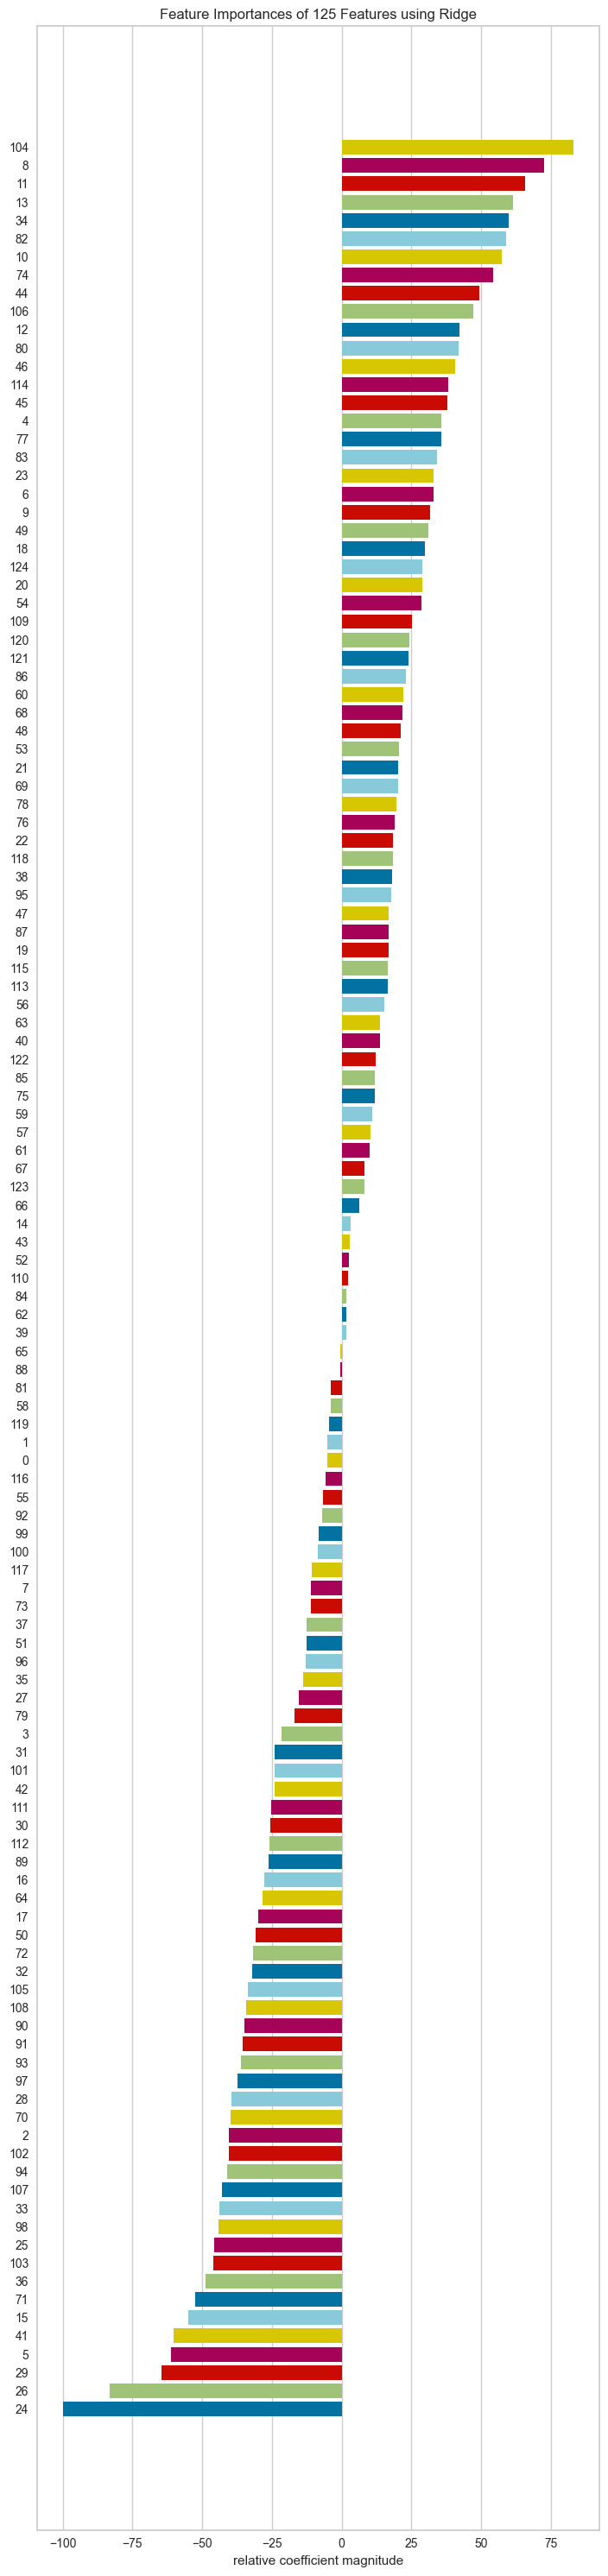

In [179]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# yellowbrick kütüphanesinin FeatureImportances fonksiyon üzerinden featurları önemlerine göre sıralayabilir veya feature
# selection yapabiliriz. Ridge modeli için en iyi scoru veren alpha=0.01 hyperparametresiyle modeli FeatureImportances
# fonksiyonunun içine veriyoruz.  labels olarak da df'in columns isimlerini veriyoruz.

# modelimiz train datası üzerinde eğitimi tamamladıktan viz.show() komutuyla görselimizi elde ediyoruz.
# Modelimiz ridge model olduğundan burda featurları önemli önemsiz olarak gruplandırabiliriz sadece. Kesinlikle
# feature selection yapamayız.

# visualizer = RadViz(size=(720, 3000)) komutu sadece görsel boyutuyla oynamak için kullanılıyor. 720,3000 sayıları
# değiştirilerek görseldeki değişimler gözlemlenebilir.

# <font color='green'> <b>Feature importances with Lasso</b><font color='black'>

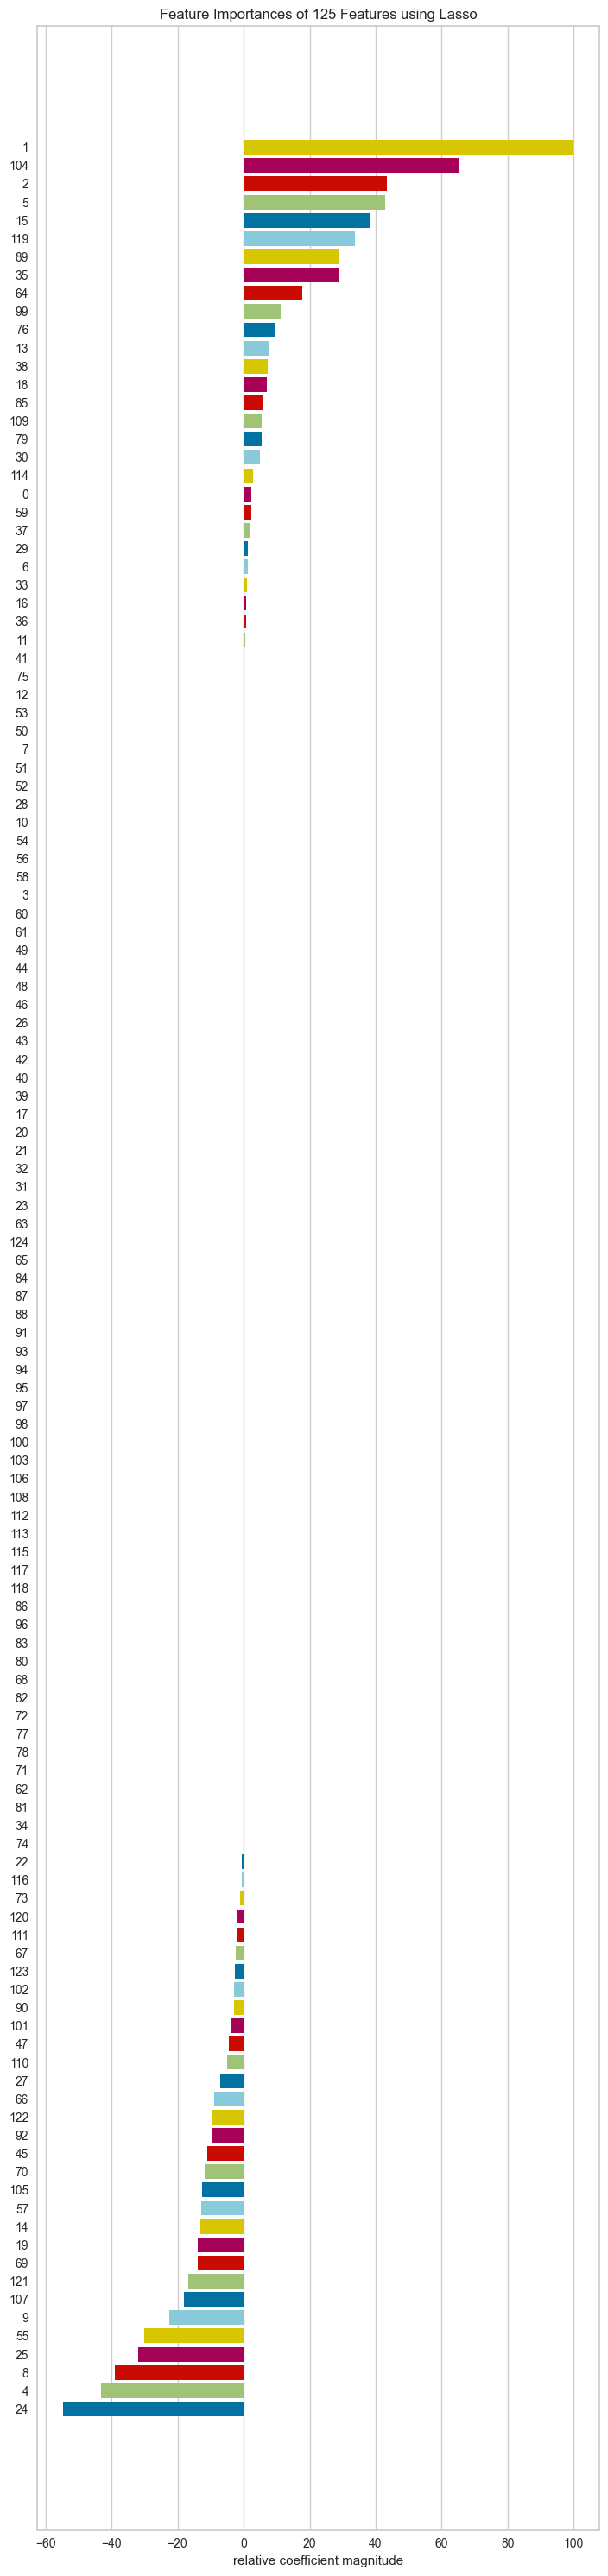

In [180]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# Lasso modeli için en iyi scoru veren alpha=0.01 hyperparametresiyle modeli FeatureImportances
# fonksiyonunun içine veriyoruz.  labels olarak da df'in columns isimlerini veriyoruz.

# lasso üzerinden feature selection yapabiliriz